In [5]:
from chase.drift import *
from chase.base import *
from chase.utils import *
from chase.fit import *
from cogmod import cpt
from chase.cpt import value_fnc
from scipy.stats.mstats import mquantiles
from mypy.viz import tableau20
import itertools

FIGDEST = '/Users/markant/code/chase/chase/paper/results_figures'
TABDEST = '/Users/markant/code/chase/chase/paper/results_tables'

def pmatch(pair):
    observed, predicted = pair
    
    if observed == 0.5 or predicted == 0.5:
        return 0.5
    elif (observed < 0.5 and predicted < 0.5) or (observed > 0.5 and predicted > 0.5):
        return 1
    else:
        return 0

def problem_array(row):
    return np.array([[row[['g1o1', 'g1p1']].values, row[['g1o2', 'g1p2']].values],
                     [row[['g2o1', 'g2p1']].values, row[['g2o2', 'g2p2']].values]])

COMPARISON_RESULTS = {}

def model_table(sid, force=False):
    if sid not in COMPARISON_RESULTS or force:
        COMPARISON_RESULTS[sid] = pd.read_csv(OUTDIR+'/modelcomparison_subj=%s.csv' % sid, index_col=0)
    return COMPARISON_RESULTS[sid]

def generate_normal_problem(problem_pars, n_x=50):
    prob = []
    for m, s in problem_pars:
        
        outcomes = norm.rvs(m, s, n_x)
        p = norm.pdf(outcomes)
        p = p/p.sum()

        prob.append(np.transpose((outcomes, p)))
    problem = np.array(prob)
    return problem

#def prelec(p, prelec_elevation, prelec_gamma):
#    return np.exp(-prelec_elevation * ((-np.log(p)) ** prelec_gamma))

AX_LW = .7
AX_COL = (.8, .8, .8)

In [84]:
from scipy.stats import nbinom

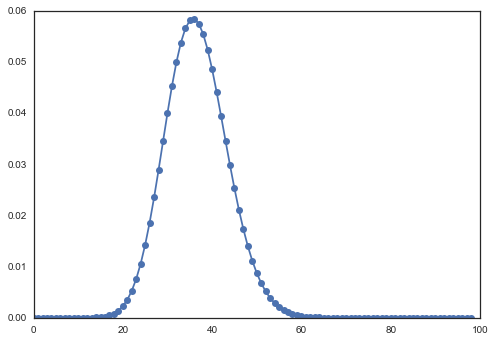

In [106]:
n, p = 150, .8
x = np.arange(1, 100)

rv = nbinom(n, p, loc=0)

plt.plot(rv.pmf(x), '-o')

# effect of pstay

In [3]:
# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 10],
        'tau': [0, 1, .5],
        'p_stay': [0, 1, .3],
        'pow_gain': [0, 1, .5],
}

# parameters that are set to fixed values 
FIXED = {'c': 0.5,
         'optiontype': 'normal'}
N_ITER = 1

OUTDIR = 'chase_fitresults_markant2016'

# a list of different parameter combinations that will
# be fit
PARSETS = [#['theta', 'p_stay', 'tau'],
           #['theta', 'theta(cost=high)', 'tau'],
           ['theta', 'theta(cost=high)', 'p_stay', 'tau'],
           #['theta', 'theta(cost=high)', 'p_stay', 'tau', 'pow_gain']
           ]

In [9]:
m = CHASEModel(drift='ev',
               startdist='laplace',
               problemtype='normal',
               problems=problems)

In [10]:
pars = deepcopy(FIXED)
pars['theta'] = 5
pars['tau'] = 0.0
pars['p_stay'] = 0.3
#m(problems['normal-0']

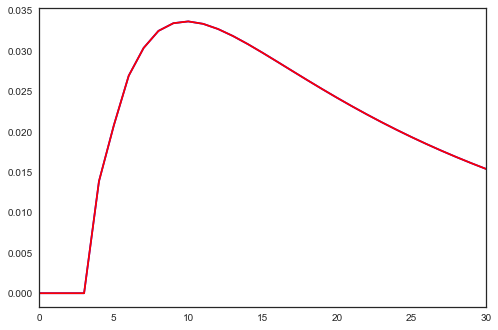

In [11]:
res = m(problems['normal-42'], pars)
ss = res['p_stop_cond']
fig, ax = plt.subplots()
ax.plot(ss[:,0], color='blue')
ax.plot(ss[:,1], color='red')
ax.set_xlim(0, 30)
plt.show()

In [12]:
pars['p_stay'] = 0.5
for pid in problems:
    res = m(problems[pid], pars)
    #ss = res['p_stop_cond']
    print pid, res['exp_samplesize']

normal-43 [[ 23.06684673  23.06684673]]
normal-42 [[ 40.33358043  40.33358043]]
normal-41 [[ 21.456578  21.456578]]
normal-40 [[ 31.69432314  31.69432314]]
normal-47 [[ 21.456578  21.456578]]
normal-46 [[ 37.33944012  37.33944012]]
normal-45 [[ 29.18342223  29.18342223]]
normal-44 [[ 31.69432314  31.69432314]]
normal-49 [[ 26.91275168  26.91275168]]
normal-48 [[ 29.18342223  29.18342223]]
normal-21 [[ 10.0001  10.0001]]
normal-20 [[ 10.0001  10.0001]]
normal-23 [[ 10.0001  10.0001]]
normal-22 [[ 10.0001  10.0001]]
normal-25 [[ 10.0001  10.0001]]
normal-24 [[ 10.0001  10.0001]]
normal-27 [[ 10.0001  10.0001]]
normal-26 [[ 10.0001  10.0001]]
normal-29 [[ 10.0001  10.0001]]
normal-28 [[ 10.0001  10.0001]]
normal-2 [[ 10.0001  10.0001]]
normal-3 [[ 10.0001  10.0001]]
normal-0 [[ 10.0001  10.0001]]
normal-1 [[ 10.0001  10.0001]]
normal-6 [[ 10.0001  10.0001]]
normal-7 [[ 10.0001  10.0001]]
normal-4 [[ 10.0001  10.0001]]
normal-5 [[ 10.0001  10.0001]]
normal-8 [[ 10.0001  10.0001]]
normal-9 

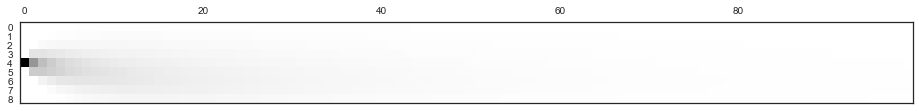

In [13]:
plt.matshow(res['states_t'].transpose())

In [14]:
m = CHASEModel(drift='ev',
               startdist='laplace',
               problemtype='normal')

[ 0.60524696  0.39475304]


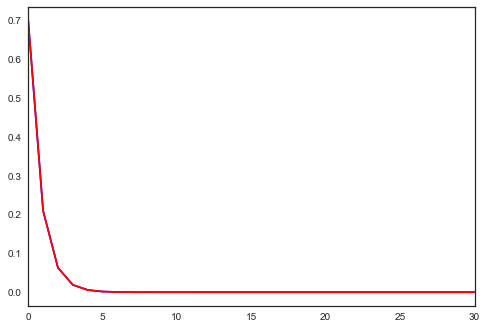

In [15]:
pars = deepcopy(FIXED)
pars['theta'] = 1
pars['tau'] = 0.0
pars['p_stay'] = 0.3

res = m(np.array([[48, 25], [42, 1600]]), pars)

print res['p_resp']

ss = res['p_stop_cond']
fig, ax = plt.subplots()
ax.plot(ss[:,0], color='blue')
ax.plot(ss[:,1], color='red')
ax.set_xlim(0, 30)
plt.show()



# data

In [6]:
data = pd.read_csv('/Users/markant/code/ChaseExp/results_v3.csv', index_col=0)
data.rename(columns={'sid': 'subject', 'probid': 'problem'}, inplace=True)
data['choice'] = data.choice.apply(lambda c: 1 if c=='B' else 0)
data['group'] = data.cost.apply(lambda c: 0 if c=='low' else 1)

probdf = pd.read_csv('/Users/markant/experiments/exp_chase/chase-v3/static/problems_normal.csv', index_col=0)
probdf['mn_diff'] = probdf['mn_B'] - probdf['mn_A']
probdf['variance'] = probdf['var_A'] # matched variance in both options

problems = {}
for i, row in probdf.iterrows():
    problems[row['id']] = np.array([[row['mn_A'], row['var_A']], 
                                    [row['mn_B'], row['var_B']]])
    
problems_obsvar = {}
for pid in problems:
    obs_var = []
    mu = problems[pid][:,0]
    sigma2 = problems[pid][:,1]/2.
    problems_obsvar[pid] = np.array([[mu[0], sigma2[0]], [mu[1], sigma2[1]]])

In [8]:
problems = problems_obsvar

In [3]:
arr = data.groupby(['subject']).apply(lambda d: [d.samplesize.mean(), (d.n_switch/(d.samplesize-1)).mean()]).values

In [4]:
ss = np.array([a[0] for a in arr])
sr = np.array([a[1] for a in arr])

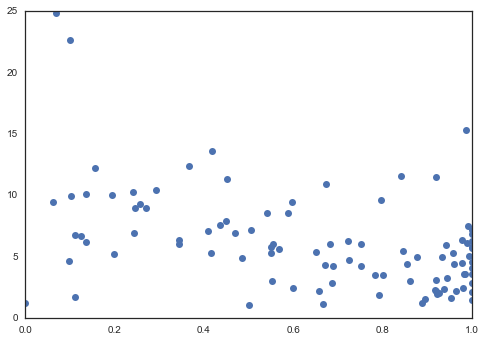

In [5]:
plt.plot(sr, ss, 'o')

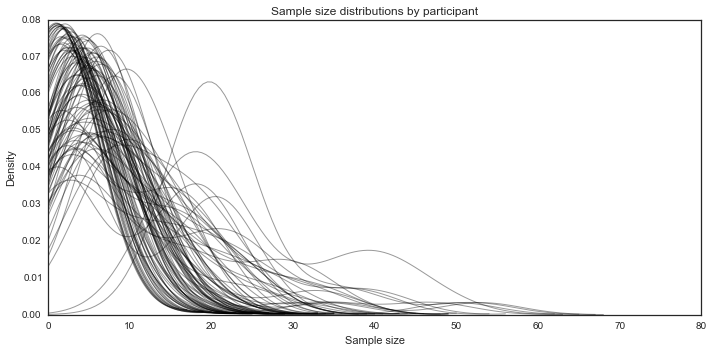

In [23]:
fig, axi = plt.subplots(1, 1, figsize=(10, 5), sharex=True)

ax = axi
for i, grp in data.groupby('subject'):
    sns.kdeplot(grp.samplesize, bw=5, color='black', alpha=.4, ax=ax, linewidth=1)
ax.legend([])
ax.set_title('Sample size distributions by participant')
ax.set_xlim(0, 80)
ax.set_xlabel('Sample size')
ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

#fig.savefig(FIGDEST+'glockner_samplesize_by_participant.pdf', bbox_inches='tight')

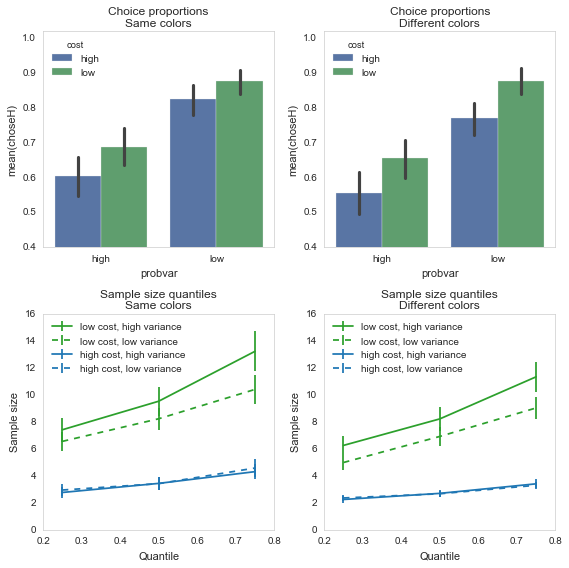

In [209]:
styl = {'low': '--',
        'high': '-'}
col = {'low': tableau20[4],
       'high': tableau20[0]}

fig, ax = plt.subplots(2, 2, figsize=(8,8))
sns.barplot(x='probvar', y='choseH', hue='cost', data=data[data.cond_color=='same'], ax=ax[0][0])
sns.barplot(x='probvar', y='choseH', hue='cost', data=data[data.cond_color=='diff'], ax=ax[0][1])
ax[0][0].set_ylim(0.4,1.02)
ax[0][1].set_ylim(0.4,1.02)
ax[0][0].set_title('Choice proportions\nSame colors')
ax[0][1].set_title('Choice proportions\nDifferent colors')

for i, color in enumerate(['same', 'diff']):
    for cost in ['low', 'high']:
        for probvar in ['high', 'low']:
            
            sel = data[(data.cond_color==color) & (data.probvar==probvar) & (data.cost==cost)]
            q = np.array(map(lambda x: np.array(x), sel.groupby('subject').apply(lambda d: mquantiles(d.samplesize)).values))
            q_obs = q.mean(axis=0)
            q_se  = q.std(axis=0)/np.sqrt(q.shape[0])
            
            ax[1][i].errorbar([.25, .5, .75], q_obs, yerr=q_se, 
                              fmt=styl[probvar], color=col[cost],
                              label=('%s cost, %s variance' % (cost, probvar)))
            ax[1][i].set_ylim(0, 16)
            ax[1][i].set_title('%s cost\n%s var' % (cost, probvar))
            ax[1][i].legend(loc='upper left')


ax[1][0].set_xlabel('Quantile')
ax[1][1].set_xlabel('Quantile')
ax[1][0].set_ylabel('Sample size')
ax[1][1].set_ylabel('Sample size')
ax[1][0].set_title('Sample size quantiles\nSame colors')
ax[1][1].set_title('Sample size quantiles\nDifferent colors')


for axi in ax.ravel():
    for i in axi.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)
plt.tight_layout()
plt.show()
fig.savefig(FIGDEST + 'exp1_results.pdf', bbox_inches='tight')

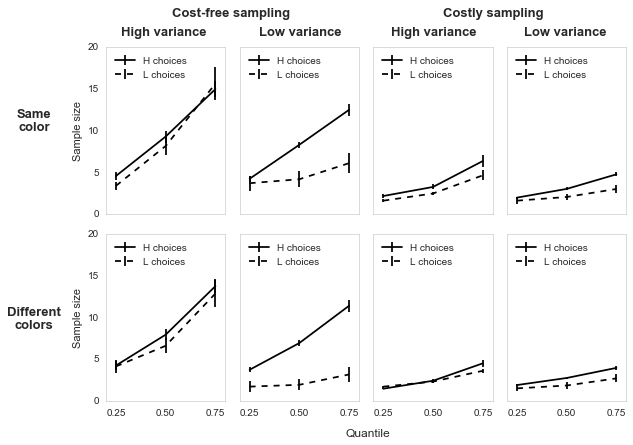

In [556]:
styl = ['--', '-']

fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)

for i, color in enumerate(['same', 'diff']):
        
    for j, cost in enumerate(['low', 'high']):
        for k, probvar in enumerate(['high', 'low']):

            axi = ax[i][2*j + k]
            
            for choseH in [1, 0]:

                sel = data[(data.cond_color==color) & (data.probvar==probvar) & (data.cost==cost) & (data.choseH==choseH)]

                
                q = np.array(map(lambda x: np.array(x), sel.groupby('problem').apply(lambda d: mquantiles(d.samplesize)).values))
                q_obs = q.mean(axis=0)
                q_se  = q.std(axis=0)/np.sqrt(q.shape[0])

                axi.errorbar([.25, .5, .75], q_obs, yerr=q_se, 
                                  fmt=styl[choseH], color='black', #linewidth=1,
                                  label=['L choices', 'H choices'][choseH])
            axi.set_ylim(0, 20)
            #axi.set_title('%s var' % (probvar))
            axi.legend(loc='upper left')

#ax[0][0].set_title('Sample size quantiles\nSame colors, L choices')
#ax[0][1].set_title('Sample size quantiles\nDifferent colors, L choices')
#ax[1][0].set_title('Same colors, H choices')
#ax[1][1].set_title('Different colors, H choices')

ax[0][0].set_ylabel('Sample size')
ax[1][0].set_ylabel('Sample size')

fig.text(.19,1.04,'Cost-free sampling', fontsize=13, fontweight='semibold')
fig.text(.66,1.04,'Costly sampling', fontsize=13, fontweight='semibold')

fig.text(.10,.99,'High variance', fontsize=13, fontweight='semibold')
fig.text(.34,.99,'Low variance', fontsize=13, fontweight='semibold')
fig.text(.57,.99,'High variance', fontsize=13, fontweight='semibold')
fig.text(.80,.99,'Low variance', fontsize=13, fontweight='semibold')

fig.text(-.05,.75, 'Same\ncolor', fontsize=13, horizontalalignment='center', fontweight='semibold')
fig.text(-.05,.25, 'Different\ncolors', fontsize=13, horizontalalignment='center', fontweight='semibold')

fig.text(.49, -.02, 'Quantile', fontsize=12)

for axi in ax.ravel():
    axi.set_xticks([.25, .5, .75])
    
    for i in axi.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)
        
plt.tight_layout()
plt.show()
fig.savefig('%s/markant_ssquantile_by_choice.pdf' % FIGDEST, bbox_inches='tight')

In [120]:
# conditional sample size
css = data.groupby(['cond_color', 'probvar', 'cost', 'choseH', 'subject']).apply(lambda d: d.samplesize.mean()).reset_index()
css.rename(columns={0: 'mn_ss'}, inplace=True)

In [141]:
css.to_csv('~/code/ChaseExp/results_v3_css.csv')

In [126]:
css_LL = css[(css.probvar=='low') & (css.cost=='low')]

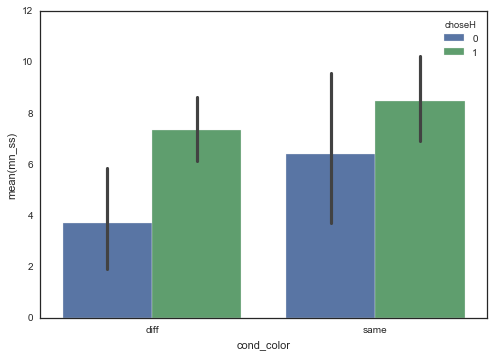

In [142]:
sns.barplot(x='cond_color', y='mn_ss', hue='choseH', data=css_LL)

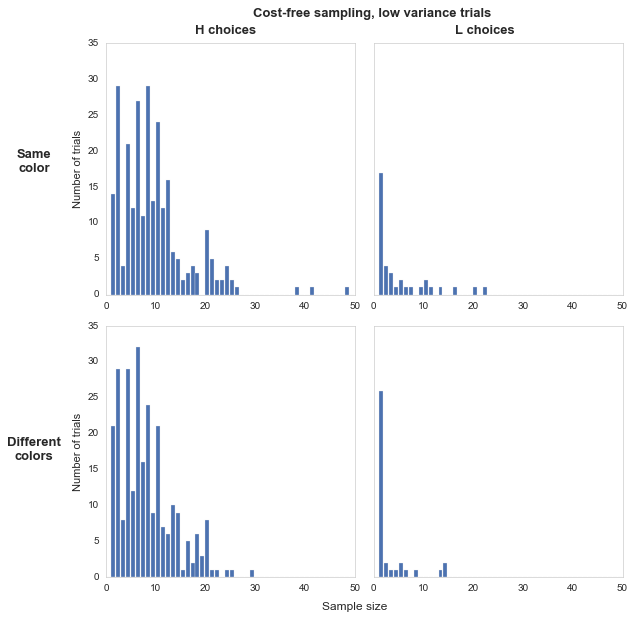

In [268]:
LL = data[(data.probvar=='low') & (data.cost=='low')]
bc1_same = np.bincount(LL[(LL.cond_color=='same') & (LL.choseH==1)].samplesize.values, minlength=50)
bc1_diff = np.bincount(LL[(LL.cond_color=='diff') & (LL.choseH==1)].samplesize.values, minlength=50)
bc0_same = np.bincount(LL[(LL.cond_color=='same') & (LL.choseH==0)].samplesize.values, minlength=50)
bc0_diff = np.bincount(LL[(LL.cond_color=='diff') & (LL.choseH==0)].samplesize.values, minlength=50)


fig, ax = plt.subplots(2,2, sharey=True, figsize=(8,8))
ax[0][0].bar(range(50), bc1_same)
ax[1][0].bar(range(50), bc1_diff)
ax[0][1].bar(range(50), bc0_same)
ax[1][1].bar(range(50), bc0_diff)

ax[0][0].set_ylabel('Number of trials')
ax[1][0].set_ylabel('Number of trials')

fig.text(.33,1.02,'Cost-free sampling, low variance trials', fontsize=13, fontweight='semibold')

fig.text(.23,.99,'H choices', fontsize=13, fontweight='semibold')
fig.text(.68,.99,'L choices', fontsize=13, fontweight='semibold')

fig.text(-.05,.75, 'Same\ncolor', fontsize=13, horizontalalignment='center', fontweight='semibold')
fig.text(-.05,.25, 'Different\ncolors', fontsize=13, horizontalalignment='center', fontweight='semibold')

fig.text(.45, -.01, 'Sample size', fontsize=12)

for axi in ax.ravel():    
    for i in axi.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)


plt.tight_layout()
plt.show()
fig.savefig(FIGDEST + 'exp1_LLtrials_ss.pdf', bbox_inches='tight')

In [258]:
print bc0_same.sum() + bc0_diff.sum()
print bc1_same.sum() + bc1_diff.sum()

74
526


In [253]:
print bc1_same.sum() + bc0_same.sum()
print bc1_diff.sum() + bc0_diff.sum()

300
300


In [104]:
plotdf = data.rename(columns={'cost': 'Sampling cost',
                              'probvar': 'Outcome variance'})

plotdf['Sampling cost'] = plotdf['Sampling cost'].apply(lambda x: 'Costly' if x=='high' else 'Cost-free')

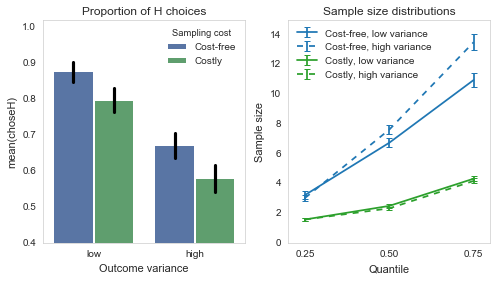

In [174]:
styl = {'low': '-',
        'high': '--'}
col = {'Cost-free': tableau20[0],
       'Costly': tableau20[4]}

p = [.25, .5, .75]
#from matplotlib import gridspec
#fig = plt.figure(figsize=(10, 5)) 
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.6])

fig, axi = plt.subplots(1, 2, figsize=(7,4))

ax = axi[0]
sns.barplot(x='Outcome variance', y='choseH', hue='Sampling cost', linewidth=2, edgecolor='white',
            errcolor='black', capsize=.1, x_order=['low', 'high'], hue_order=['Cost-free', 'Costly'],
            data=plotdf, ax=ax)
ax.set_ylim(0.4,1.02)
ax.set_title('Proportion of H choices')

#ax = plt.subplot(gs[1])
ax = axi[1]
for cost in ['Cost-free', 'Costly']:
    for probvar in ['low', 'high']:

        sel = plotdf[(plotdf['Outcome variance']==probvar) & (plotdf['Sampling cost']==cost)]
        q = np.array(map(lambda x: np.array(x), sel.groupby('problem').apply(lambda d: mquantiles(d.samplesize)).values))
        q_obs = q.mean(axis=0)
        q_se  = q.std(axis=0)/np.sqrt(q.shape[0])

        
        ax.errorbar([.25, .5, .75], q_obs, yerr=q_se, 
                    fmt=styl[probvar], color=col[cost],
                    label=('%s, %s variance' % (cost, probvar)),
                    markeredgewidth=1)

        ax.set_ylim(0, 15)
        ax.legend(loc='upper left')


ax.set_xlabel('Quantile')
ax.set_xticks(p)
ax.set_ylabel('Sample size')
ax.set_title('Sample size distributions')

#fig.text(.02,.93,'A', fontsize=15, fontweight='semibold')
#fig.text(.52,.93,'B', fontsize=15, fontweight='semibold')


for ax in axi.ravel():
    for i in ax.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)
plt.tight_layout()
plt.show()
fig.savefig(FIGDEST + 'exp1_results_combined.pdf', bbox_inches='tight')

In [48]:
arr = []
for i, grp in data.groupby(['cost', 'problem']):
    cost, probid = i
    probvar = grp.probvar.values[0]
    mn_diff = grp.mn_diff.values[0]
    pH = grp.choseH.mean()
    ss_med = np.median(grp.samplesize.values)
    
    arr.append([probid, cost, probvar, mn_diff, pH, ss_med])
df = pd.DataFrame(arr, columns=['probid', 'cost', 'probvar', 'mn_diff', 'pH', 'ss_med'])

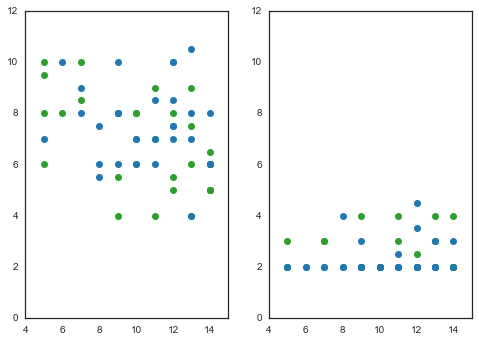

In [60]:
cols = [tableau20[4], tableau20[0]]
fig, ax = plt.subplots(1, 2)
for j, cost in enumerate(['low', 'high']):
    for i, probvar in enumerate(['low', 'high']):
        sel = df[(df.cost==cost) & (df.probvar==probvar)]
        ax[j].plot(sel.mn_diff.values, sel.ss_med, 'o', color=cols[i])
    ax[j].set_xlim(4,15)
    ax[j].set_ylim(0, 12)
plt.show()

In [7]:
data = pd.read_csv('/Users/markant/code/ChaseExp/markant_trialdata.csv', index_col=0)

In [8]:
data.head()

,subject,problem,cond_cost,cond_var,cond_color,trial,option,outcome,choice
0,91,normal-37,high,high,diff,0,0,38,0
1,91,normal-55,low,high,diff,0,0,21,1
2,91,normal-55,low,high,diff,1,1,65,1
3,91,normal-55,low,high,diff,2,1,51,1
4,91,normal-4,low,low,diff,0,0,38,0


In [9]:
problems_obsvar = {}
for pid in problems:
    obs_var = []
    mu = problems[pid][:,0]
    sigma2 = [np.var(data[(data.problem==pid) & (data.option==i)]['outcome'].values) for i in [0,1]]
    problems_obsvar[pid] = np.array([[mu[0], sigma2[0]], [mu[1], sigma2[1]]])

In [10]:
v = np.ravel([problems_obsvar[pid][:,1] for pid in problems])
print np.mean(v[v < 100])
print np.mean(v[v > 100])

12.3009733835
794.132569626


In [1]:
pid = 'normal-30'
options = problems_obsvar[pid]
print options
xs = np.arange(-100, 180)
i = 1
plt.plot(xs, norm.pdf(xs, options[i][0], np.sqrt(options[i][1])))
outcomes = data[(data.problem==pid) & (data.option==i)]['outcome'].values
sns.distplot(outcomes)

NameError: name 'problems_obsvar' is not defined

# Fitting CHASE (aggregate)

In [19]:
# number of iterations for each parameter set
N_ITER = 3

# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 4],
        'p_stay': [0, 1, .5],
        'tau': [0, 1, .5],
        'prelec_gamma': [0, 5, 1.],
        'prelec_elevation': [0, 5, 1.],
        'pow_gain': [0., 2, 1.],
        'w_loss': [0., np.inf, 1.],
        'lambda': [-2, 2, 0.],
        'sc': [0, 15, 1],
        'p_stop': [0, 1, .5]}

PARSETS = {}
PARSETS['optional'] = [['theta', 'theta(cost=high)', 'p_stay', 'tau', 'sc', 'pow_gain'],
                       ['theta', 'theta(cost=high)', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc', 'pow_gain'],
                       #['theta', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                       #['theta', 'theta(cost=high)', 'p_stay', 'tau', 'sc'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                       #['theta', 'p_stay', 'tau', 'pow_gain'],
                       #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                       ]

PARSETS['geometric'] = [['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                        #['p_stop', 'p_stay', 'tau', 'tau(cond_color=diff)', 'sc'],
                        #['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'sc'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                        #['p_stop', 'p_stay', 'tau', 'pow_gain'],
                        #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                        ]

FIXED = {}
for pref_units in ['sums', 'diffs']:
    FIXED[('optional',pref_units)] = {'p_sample_H': 0.5,
                                      'pref_units': pref_units,
                                      'optiontype': 'normal',
                                      'stoprule': 'optional'}

    FIXED[('geometric',pref_units)] = {'p_sample_H': 0.5,
                                       'pref_units': pref_units,
                                       'optiontype': 'normal',
                                       'stoprule': 'geometric',
                                       'theta': 30}
    
cp = {}
bf_cp = {}
bf_par = {}
msd_cp = {}
quant = {}
bf_quant = {}

cp_asc = {}
bf_cp_asc = {}

In [23]:
SIM_ID = 'markant_exp_obsvar'
OUTDIR = 'results_fits/chase_fitresults_markant'

In [26]:
#for stoprule, pref_units in itertools.product(['optional', 'geometric'], ['diffs', 'sums']):
for stoprule, pref_units in itertools.product(['optional'], ['sums']):
    print '[%s, %s]\nsaving results to %s' % (stoprule, pref_units, OUTDIR)
    P = PARSETS[stoprule]
    F = FIXED[(stoprule,pref_units)]
    
    if stoprule == 'optional':      model = CHASEModel
    elif stoprule == 'geometric':   model = CHASEAlternateStoppingModel
        
    for parset in P:

        fitting = {}
        for p in parset:
            if p.count('(') > 0:
                fitting[p] = PARS[p.split('(')[0]]
            else:
                fitting[p] = PARS[p]


        m = model(drift='cpt',
                  startdist='laplace',
                  problemtype='normal',
                  problems=problems_obsvar,
                  stoprule=stoprule)

        # fit
        results = fit_mlh(m, problems_obsvar, data, SIM_ID, F, fitting, 
                          niter=N_ITER, outdir=OUTDIR)

        print results.sort('nllh')

[optional, sums]
saving results to results_fits/chase_fitresults_markant
markant_exp_obsvar(p_stay,pow_gain,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=sums,stoprule=optional)
0/48
['theta(cost=high)', 'theta']: [ 1.  1.]
iteration                    0
success                   True
nllh                   8207.88
k                            6
N                         2400
bic                    16462.5
theta(cost=high)             1
theta                        1
p_stay                0.834596
pow_gain             0.0192257
sc                     4.67637
tau                 1.4571e-06
Name: 0, dtype: object
markant_exp_obsvar(p_stay,pow_gain,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=sums,stoprule=optional)
1/48
['theta(cost=high)', 'theta']: [ 1.  2.]
iteration                  0
success                 True
nllh                 7486.03
k                          6
N                       2400
bic                  15018.8


/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [560]:
# create a table summarizing the best-fitting result for each parameter
# combination
allresults = pd.DataFrame(columns=['sim_id', 'stoprule', 'pref_units', 'k', 'N', 'nllh', 'bic'])

for stoprule, pref_units in itertools.product(['optional', 'geometric'], ['diffs', 'sums']):
#for stoprule, pref_units in itertools.product(['optional'], ['diffs']):

    P = PARSETS[stoprule]
    F = FIXED[(stoprule,pref_units)]
            
    for parset in P:
        fitting = {}
        for p in parset:
            if p.count('(') > 0:
                fitting[p] = PARS[p.split('(')[0]]
            else:
                fitting[p] = PARS[p]


        b = best_result(SIM_ID, F, fitting, outdir=OUTDIR, nopars=True)
        b['stoprule'] = stoprule
        b['pref_units'] = pref_units
        allresults.loc[allresults.shape[0]] = b

allresults.sort_values(by='bic', inplace=True)
allresults.to_csv('%s/%s_fitsummary.csv' % (TABDEST, SIM_ID))

In [561]:
allresults

,sim_id,stoprule,pref_units,k,N,nllh,bic
2,"markant_exp_obsvar(p_stay,sc,tau,theta,theta(c...",optional,diffs,5.0,2400.0,7412.880500,14864.677119
0,"markant_exp_obsvar(p_stay,sc,tau,tau(cond_colo...",optional,diffs,6.0,2400.0,7410.549720,14867.798784
5,"markant_exp_obsvar(p_stay,sc,tau,theta,theta(c...",optional,sums,5.0,2400.0,7480.443456,14999.803032
3,"markant_exp_obsvar(p_stay,sc,tau,tau(cond_colo...",optional,sums,6.0,2400.0,7478.291485,15003.282314
8,"markant_exp_obsvar(p_stay,p_stop,p_stop(cost=h...",geometric,diffs,5.0,2400.0,7753.406139,15545.728398
7,"markant_exp_obsvar(p_stay,p_stop,sc,tau,tau(co...",geometric,diffs,5.0,2400.0,7755.506653,15549.929427
6,"markant_exp_obsvar(p_stay,p_stop,p_stop(cost=h...",geometric,diffs,6.0,2400.0,7755.447261,15557.593866
1,"markant_exp_obsvar(p_stay,sc,tau,tau(cond_colo...",optional,diffs,5.0,2400.0,7787.553343,15614.022806
4,"markant_exp_obsvar(p_stay,sc,tau,tau(cond_colo...",optional,sums,5.0,2400.0,7845.440687,15729.797494
10,"markant_exp_obsvar(p_stay,p_stop,sc,tau,tau(co...",geometric,sums,5.0,2400.0,7851.558564,15742.033247


In [563]:
# setup a selected model to show results
stoprule = 'optional'
pref_units = 'diffs'
parset = PARSETS[stoprule][2]
F = FIXED[(stoprule,pref_units)]
fitting = {}
for p in parset:
    if p.count('(') > 0:
        fitting[p] = PARS[p.split('(')[0]]
    else:
        fitting[p] = PARS[p]
r = best_result(SIM_ID, F, fitting, outdir=OUTDIR)
bf_par[SIM_ID] = {p: r[p] for p in fitting}

In [564]:
r

index                                                              13
Unnamed: 0                                                         13
iteration                                                           0
success                                                          True
nllh                                                          7412.88
k                                                                   5
N                                                                2400
bic                                                           14864.7
theta                                                               4
theta(cost=high)                                                    2
p_stay                                                    1.33733e-10
sc                                                            7.84189
tau                                                          0.540878
sim_id              markant_exp_obsvar(p_stay,sc,tau,theta,theta(c...
Name: 0, dtype: obje

In [565]:
# for the selected model, run the model and get the 
# predicted choice proportions and sample size distribution
if stoprule == 'optional':      model = CHASEModel
elif stoprule == 'geometric':   model = CHASEAlternateStoppingModel
m = model(drift='ev',
          startdist='laplace',
          problems=problems_obsvar,
          problemtype='normal',
          stoprule=stoprule)


pred = predict_from_result(m, problems_obsvar, data, SIM_ID, F, 
                           fitting = fitting, 
                           outdir=OUTDIR)

cp[SIM_ID] = np.array([data[data.problem==i].choice.mean() for i in problems])
bf_cp[SIM_ID] = np.array([pred[pred.problem==i].cp.mean() for i in problems])

quant[SIM_ID] = mquantiles(data.samplesize)
bf_quant[SIM_ID] = pred[['ss(.25)', 'ss(.5)', 'ss(.75)']].mean(axis=0).values

msd_cp[SIM_ID] = np.round(((cp[SIM_ID] - bf_cp[SIM_ID])**2).mean(), 3)
print 'MSD: %s' % msd_cp[SIM_ID]

MSD: 0.009


In [133]:
from scipy.stats import pearsonr

In [566]:
observed = cp[SIM_ID]
predicted = bf_cp[SIM_ID]
pagree = np.sum(map(pmatch, zip(observed, predicted))) / float(len(observed))
tmp = filter(lambda pair: pair[0] != 0.5, zip(observed, predicted))
pagree_corr = np.sum(map(pmatch, tmp)) / float(len(tmp))

msd = np.round(np.mean((observed - predicted) ** 2), 4)
rcorr = np.round(pearsonr(observed, predicted)[0], 4)

tot_ss = np.sum((observed - np.mean(observed)) ** 2)
res_ss = np.sum((observed - predicted) ** 2)
r_sq = 1 - (res_ss / tot_ss)

print 'p(agree):\t', pagree
print 'p(agree)2:\t', pagree_corr
print 'r:\t\t', rcorr
print 'msd:\t\t', msd
print 'R2:\t\t', r_sq

p(agree):	1.0
p(agree)2:	1.0
r:		0.8154
msd:		0.0087
R2:		0.459596896478


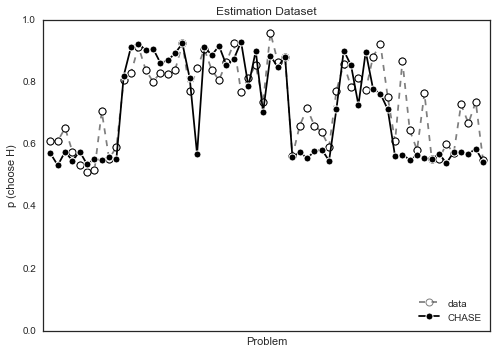

In [567]:
study = SIM_ID
labels = ['Estimation Dataset', 'Competition Dataset']
col = ['black', 'black']
i = 0
fig, ax = plt.subplots(figsize=(7, 5), sharex=True)
axi = ax
axi.plot(range(1, 61), cp[study], '--o', markerfacecolor='white', markeredgecolor=col[i], 
         markeredgewidth=1, color=col[i], alpha=.5,
         label='data')

# hacky
axi.plot(range(1, 61), cp[study], 'o', markerfacecolor='white', markeredgecolor=col[i],
         markeredgewidth=1)


axi.plot(range(1, 61), bf_cp[study], '-o', markerfacecolor=col[i], markeredgecolor='white', 
         markeredgewidth=1, color=col[i], label='CHASE')
axi.set_ylim(0, 1)
axi.set_xlim(0, 61)
axi.set_xticks([])
axi.set_xlabel('Problem')
axi.set_ylabel('p (choose H)')
axi.set_title(labels[i])
axi.legend(loc='lower right')
plt.tight_layout()
plt.show()
#fig.savefig(FIGDEST + 'tpt_choiceprop.pdf', bbox_inches='tight')

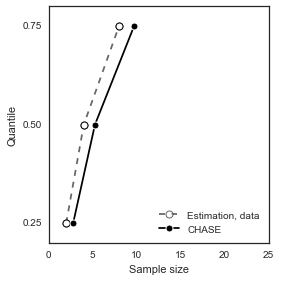

In [568]:
labels = ['Estimation', 'Competition']
col = ['black', 'gray']


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

axi = ax

axi.plot(quant[study], [.25, .5, .75], '--o', color=col[i],
         markerfacecolor='white', markeredgecolor=col[i], 
         markeredgewidth=1, label='%s, data' % labels[i], alpha=.6)

# hacky
axi.plot(quant[study], [.25, .5, .75], 'o', color=col[i],
         markerfacecolor='white', markeredgecolor=col[i], markeredgewidth=1)

axi.plot(bf_quant[study], [.25, .5, .75], '-o', color='black', 
         markerfacecolor='black', markeredgecolor='white',
         markeredgewidth=1, label='CHASE')

axi.set_xlim(0, 25)
axi.legend(loc='lower right')
axi.set_xlabel('Sample size')
axi.set_ylabel('Quantile')
axi.set_yticks([.25, .5, .75])

plt.tight_layout()
plt.show()
#fig.savefig('%s/tpt_quantiles.pdf' % FIGDEST, bbox_inches='tight')

In [569]:
arr = []
for cost in ['low', 'high']:
    for probvar in ['low', 'high']:
        ind = (data.probvar==probvar) & (data.cost==cost)
        cost_lab = 'Cost-free' if cost=='low' else 'Costly'
        
        predicted_cp = pred[ind].cp.mean()
    
        q   = np.mean(pred[ind][['ss(.25)', 'ss(.5)', 'ss(.75)']].values, axis=0)
        q_L = np.mean(pred[ind][['ss_L(.25)', 'ss_L(.5)', 'ss_L(.75)']].values, axis=0)
        q_H = np.mean(pred[ind][['ss_H(.25)', 'ss_H(.5)', 'ss_H(.75)']].values, axis=0)
        arr.append([cost_lab, probvar, predicted_cp] + list(q) + list(q_L) + list(q_H))

pdf = pd.DataFrame(arr, columns=['Sampling cost', 'Outcome variance', 'predicted_cp', 
                                 'predicted_ss(.25)', 'predicted_ss(.5)', 'predicted_ss(.75)',
                                 'predicted_ss_L(.25)', 'predicted_ss_L(.5)', 'predicted_ss_L(.75)',
                                 'predicted_ss_H(.25)', 'predicted_ss_H(.5)', 'predicted_ss_H(.75)'])

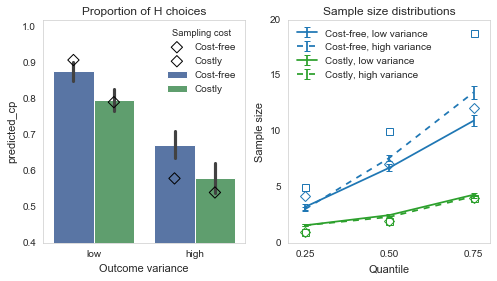

In [570]:
styl = {'low': '-',
        'high': '--'}
col = {'Cost-free': tableau20[0],
       'Costly': tableau20[4]}

p = [.25, .5, .75]

fig, axi = plt.subplots(1, 2, figsize=(7,4))

ax = axi[0]
bp = sns.barplot(x='Outcome variance', y='choseH', hue='Sampling cost', linewidth=1, 
                 edgecolor='white', capsize=2, x_order=['low', 'high'], hue_order=['Cost-free', 'Costly'],
                 data=plotdf, ax=ax)
sns.stripplot(x='Outcome variance', y='predicted_cp', hue='Sampling cost', data=pdf,
              edgecolor='black', facecolor='None', marker='D', size=8, ax=ax)
ax.set_ylim(0.4,1.02)
ax.set_title('Proportion of H choices')

#ax = plt.subplot(gs[1])
ax = axi[1]
for cost in ['Cost-free', 'Costly']:
    for probvar in ['low', 'high']:

        sel = plotdf[(plotdf['Outcome variance']==probvar) & (plotdf['Sampling cost']==cost)]
        q = np.array(map(lambda x: np.array(x), sel.groupby('problem').apply(lambda d: mquantiles(d.samplesize)).values))
        q_obs = np.mean(q, axis=0)
        q_se  = q.std(axis=0)/np.sqrt(q.shape[0])
        
        ax.errorbar([.25, .5, .75], q_obs, yerr=q_se, 
                    fmt=styl[probvar], color=col[cost],
                    label=('%s, %s variance' % (cost, probvar)),
                    markeredgewidth=1)

        mrk = 'D' if probvar == 'low' else 's'
        pdf_c = pdf[(pdf['Outcome variance']==probvar) & (pdf['Sampling cost']==cost)][['predicted_ss(.25)', 'predicted_ss(.5)', 'predicted_ss(.75)']]

        ax.plot([.25, .5, .75], pdf_c.values[0], mrk, color=col[cost],
                markeredgewidth=1, markerfacecolor='None', markeredgecolor=col[cost])
        
        ax.set_ylim(0, 20)
        ax.legend(loc='upper left')


ax.set_xlabel('Quantile')
ax.set_xticks(p)
ax.set_ylabel('Sample size')
ax.set_title('Sample size distributions')

#fig.text(.02,.93,'A', fontsize=15, fontweight='semibold')
#fig.text(.52,.93,'B', fontsize=15, fontweight='semibold')


for ax in axi.ravel():
    for i in ax.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)
plt.tight_layout()
plt.show()
fig.savefig('%s/markant_results_combined.pdf' % FIGDEST, bbox_inches='tight')

In [508]:
data.head()

,subject,gameind,problem,probvar,cond_color,cond_ecology,cost,samplesize,n_switch,choice,choseH,mn_diff,group,optiontype,tau,stoprule,p_sample_H,theta,sc,pref_units,p_stay
0,91,0,normal-37,high,diff,normal,high,1,0,0,0,9,1,normal,0.582594,optional,0.5,2,7.846956,diffs,4.534415e-08
1,91,1,normal-55,high,diff,normal,low,3,1,1,1,14,0,normal,0.582594,optional,0.5,4,7.846956,diffs,4.534415e-08
2,91,2,normal-4,low,diff,normal,low,1,0,0,0,7,0,normal,0.582594,optional,0.5,4,7.846956,diffs,4.534415e-08
3,91,3,normal-15,low,diff,normal,high,2,1,1,1,7,1,normal,0.582594,optional,0.5,2,7.846956,diffs,4.534415e-08
4,91,4,normal-52,high,diff,normal,low,2,1,0,0,14,0,normal,0.582594,optional,0.5,4,7.846956,diffs,4.534415e-08


In [514]:
arr = []
for cost in ['low', 'high']:
    for probvar in ['low', 'high']:
        for cond_color in ['same', 'diff']:
            ind = (data.probvar==probvar) & (data.cost==cost) & (data.cond_color==cond_color)
            cost_lab = 'Cost-free' if cost=='low' else 'Costly'

            #predicted_cp = pred[ind].cp.mean()
            #q   = np.mean(pred[ind][['ss(.25)', 'ss(.5)', 'ss(.75)']].values, axis=0)
            q_L = np.mean(pred[ind][['ss_L(.25)', 'ss_L(.5)', 'ss_L(.75)']].values, axis=0)
            q_H = np.mean(pred[ind][['ss_H(.25)', 'ss_H(.5)', 'ss_H(.75)']].values, axis=0)
            arr.append([cost_lab, probvar, cond_color] + list(q_L) + list(q_H))

pdf = pd.DataFrame(arr, columns=['Sampling cost', 'Outcome variance', 'Color condition',
                                 'predicted_ss_L(.25)', 'predicted_ss_L(.5)', 'predicted_ss_L(.75)',
                                 'predicted_ss_H(.25)', 'predicted_ss_H(.5)', 'predicted_ss_H(.75)'])

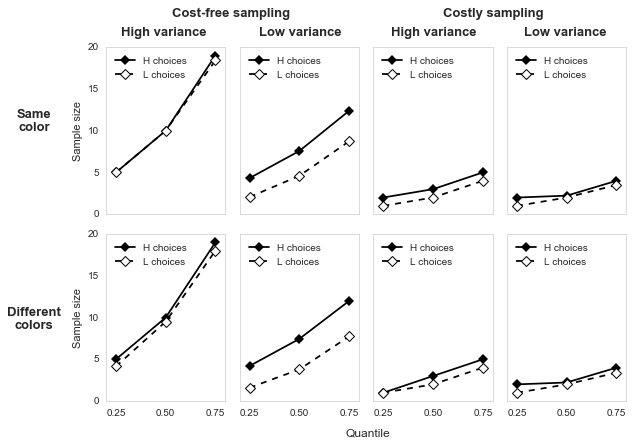

In [546]:
fig, axi = plt.subplots(2, 4, sharex=True, sharey=True)

for i in range(2):
    for j in range(4):

        cost = ['Cost-free','Costly'][j/2]
        probvar = ['high','low'][j%2]
        color_cond = ['same', 'diff'][i]
        ind = (pdf['Sampling cost']==cost) & (pdf['Outcome variance']==probvar) & (pdf['Color condition']==color_cond)

        ax = axi[i][j]
        q_L = pdf[ind][['predicted_ss_L(.25)', 'predicted_ss_L(.5)', 'predicted_ss_L(.75)']].values[0]
        q_H = pdf[ind][['predicted_ss_H(.25)', 'predicted_ss_H(.5)', 'predicted_ss_H(.75)']].values[0]
        ax.plot([.25, .5, .75], q_H, '-D', color='black', label='H choices')
        ax.plot([.25, .5, .75], q_L, '--D', markerfacecolor='white', 
                markeredgecolor='black', markeredgewidth=1, color='black', label='L choices')

        ax.legend(loc='upper left')
        ax.set_ylim(0, 20)

axi[0][0].set_ylabel('Sample size')
axi[1][0].set_ylabel('Sample size')

fig.text(.19,1.04,'Cost-free sampling', fontsize=13, fontweight='semibold')
fig.text(.66,1.04,'Costly sampling', fontsize=13, fontweight='semibold')

fig.text(.10,.99,'High variance', fontsize=13, fontweight='semibold')
fig.text(.34,.99,'Low variance', fontsize=13, fontweight='semibold')
fig.text(.57,.99,'High variance', fontsize=13, fontweight='semibold')
fig.text(.80,.99,'Low variance', fontsize=13, fontweight='semibold')

fig.text(-.05,.75, 'Same\ncolor', fontsize=13, horizontalalignment='center', fontweight='semibold')
fig.text(-.05,.25, 'Different\ncolors', fontsize=13, horizontalalignment='center', fontweight='semibold')

fig.text(.49, -.02, 'Quantile', fontsize=12)

for ax in axi.ravel():
    ax.set_xticks([.25, .5, .75])
    
    for i in ax.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)


plt.tight_layout()
plt.show()
fig.savefig('%s/markant_fit_ss_by_choice.pdf' % FIGDEST, bbox_inches='tight')

# Fitting CHASE (individual)

In [21]:
# number of iterations for each parameter set
N_ITER = 1

# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 10],
        'p_stay': [0, 1],
        'tau': [0, 1, .5],
        'prelec_gamma': [0, 5, 1.],
        'prelec_elevation': [0, 5, 1.],
        'pow_gain': [0., 5, 1.],
        'w_loss': [0., np.inf, 1.],
        'lambda': [-2, 2, 0.],
        'sc': [0, 10, 1],
        'p_stop': [0, 1, .5]}

PARSETS = {}
PARSETS['optional'] = [['theta', 'theta(cost=high)', 'p_stay', 'tau', 'sc'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma'],
                       #['theta', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                       #['theta', 'p_stay', 'tau', 'pow_gain'],
                       #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                       ]

PARSETS['geometric'] = [['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'sc'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma'],
                        #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
                        #['p_stop', 'p_stay', 'tau', 'pow_gain'],
                        #['theta', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
                        ]

## Optional stopping

In [17]:
OUTDIR = 'results_fits/chase_fitresults_markant_individual'

In [22]:
SSET

array([ 91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       120, 121, 123, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153,
       154, 155, 158, 159, 161, 162, 163, 166, 169, 170, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 183, 184, 186, 188, 190, 191, 192,
       194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 213, 214, 215, 216, 217, 218])

In [24]:
SSET = data.subject.unique()
#for sid in SSET:
for sid in [92]:
    
    SIM_ID = 'markant_exp_subj%s' % sid
    
    for stoprule, pref_units in itertools.product(['optional', 'geometric'], ['diffs', 'sums']):

        print '[%s, %s]\nsaving results to %s' % (stoprule, pref_units, OUTDIR)
        P = PARSETS[stoprule]
        F = FIXED[(stoprule,pref_units)]

        if stoprule == 'optional':      model = CHASEModel
        elif stoprule == 'geometric':   model = CHASEAlternateStoppingModel

        for parset in P:

            fitting = {}
            for p in parset:
                if p.count('(') > 0:
                    fitting[p] = PARS[p.split('(')[0]]
                else:
                    fitting[p] = PARS[p]


            m = model(drift='ev',
                      startdist='laplace',
                      problemtype='normal',
                      problems=problems,
                      stoprule=stoprule)

            # fit
            results = fit_mlh(m, problems, data[data.subject==sid], SIM_ID, F, fitting, 
                              niter=N_ITER, outdir=OUTDIR)

            print results.sort('nllh')

[optional, diffs]
saving results to results_fits/chase_fitresults_markant_individual
markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=diffs,stoprule=optional)
0/100
['theta', 'theta(cost=high)']: [ 1.  1.]
iteration                    0
success                   True
nllh                   81.0414
k                            5
N                           24
bic                    177.973
theta                        1
theta(cost=high)             1
p_stay                0.887841
sc                    0.523362
tau                 0.00434826
Name: 0, dtype: object
markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=diffs,stoprule=optional)
1/100
['theta', 'theta(cost=high)']: [ 1.  2.]
iteration                  0
success                 True
nllh                 90.1074
k                          5
N                         24
bic                  196.105
theta                      1
thet

/Users/markant/code/chase/chase/drift.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  d = delta / (sc * np.sqrt(sigma2))


markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=diffs,stoprule=optional)
6/100
['theta', 'theta(cost=high)']: [ 1.  7.]
iteration                   0
success                  True
nllh                  131.154
k                           5
N                          24
bic                   278.199
theta                       1
theta(cost=high)            7
p_stay               0.868142
sc                  0.0278032
tau                         1
Name: 6, dtype: object
markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=diffs,stoprule=optional)
7/100
['theta', 'theta(cost=high)']: [ 1.  8.]
iteration                  0
success                 True
nllh                  127.64
k                          5
N                         24
bic                  271.171
theta                      1
theta(cost=high)           8
p_stay              0.672643
sc                  0.412931
tau          

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=sums,stoprule=optional)
0/100
['theta', 'theta(cost=high)']: [ 1.  1.]
iteration                   0
success                  True
nllh                  81.2899
k                           5
N                          24
bic                    178.47
theta                       1
theta(cost=high)            1
p_stay               0.887864
sc                     0.1215
tau                 0.0478025
Name: 0, dtype: object
markant_exp_subj92(p_stay,sc,tau,theta,theta(cost=high)|optiontype=normal,p_sample_H=0.5,pref_units=sums,stoprule=optional)
1/100
['theta', 'theta(cost=high)']: [ 1.  2.]
iteration                  0
success                 True
nllh                 90.3416
k                          5
N                         24
bic                  196.573
theta                      1
theta(cost=high)           2
p_stay              0.867957
sc                  0.121288
tau            

In [4]:
SUBJ=data.subject.unique()

In [14]:
SUBJ = [91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       120, 121, 123, 127, 128, 129, 130, 134, 135, 136, 137]

In [69]:
SUBJ = [92]

In [15]:
PARSETS = [#['theta', 'p_stay', 'tau'],
           ['theta', 'theta(cost=high)', 'p_stay', 'tau'],
           #['theta', 'theta(cost=high)', 'p_stay', 'tau', 'pow_gain']
           ]
FIXED = {'c': 0.5,
         'optiontype': 'normal',}

In [70]:
m = CHASEModel(drift='ev',
               startdist='laplace',
               problemtype='normal',
               problems=problems)


data['model_pH'] = np.zeros(data.shape[0])
for q in ['.25', '.5', '.75']:
    data['model_ss(%s)' % q] = np.zeros(data.shape[0])


for sid in SUBJ:
    cond_color = data.loc[data.subject==sid]['cond_color'].values[0]

    results = pd.DataFrame([], columns=['sim_id', 'sid', 'cond_color', 'k', 'N', 'nllh', 'bic', 'p_stay', 'tau', 
                                        'theta', 'theta(cost=high)', 'p_stop', 'pow_gain'])

    for i, parset in enumerate(PARSETS):
        model_id = 'markant2016_subj%s' % sid
        fitting = {}
        for p in parset:
            if p.count('(') > 0:
                fitting[p] = PARS[p.split('(')[0]]
            else:
                fitting[p] = PARS[p]

        b = best_result(model_id, FIXED, fitting, outdir=OUTDIR)
        pred = predict_from_result(m, problems, data[data.subject==sid], model_id, FIXED, 
                       fitting = fitting, 
                       outdir=OUTDIR)
        
        data.loc[data.subject==sid,'model_pH'] = pred['cp'].values
        for q in ['.25', '.5', '.75']:
            data.loc[data.subject==sid,'model_ss(%s)' % q] = pred['ss(%s)' % q].values
        b['sid'] = sid
        b['cond_color'] = cond_color
        results.loc[results.shape[0]] = b

    results.to_csv(OUTDIR+'/modelcomparison_subj=%s.csv' % sid)

markant2016_subj92(p_stay,tau,theta,theta(cost=high)|c=0.5,optiontype=normal)
chase_fixedvar_fitresults_markant2016/markant2016_subj92(p_stay,tau,theta,theta(cost=high)|c=0.5,optiontype=normal).csv
markant2016_subj92(p_stay,tau,theta,theta(cost=high)|c=0.5,optiontype=normal)
chase_fixedvar_fitresults_markant2016/markant2016_subj92(p_stay,tau,theta,theta(cost=high)|c=0.5,optiontype=normal).csv


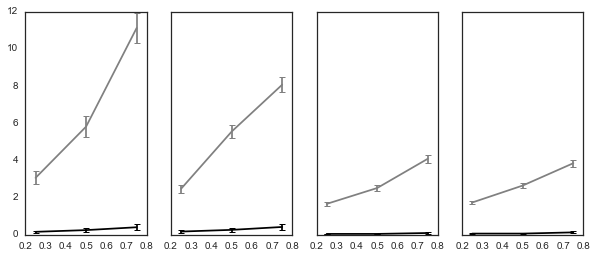

In [71]:
fig, ax = plt.subplots(1,4, figsize=(10,4), sharey=True)
i = -1
styl = {'low': '-',
        'high': '-'}
col = {'low': tableau20[4],
       'high': tableau20[0]}


for cost in ['low', 'high']:
    for probvar in ['high', 'low']:
        i += 1
        axi = ax[i]
        sel = data[(data.probvar==probvar) & (data.cost==cost) & (data.subject < 130)]
        q = np.array(map(lambda x: np.array(x), sel.groupby('problem').apply(lambda d: mquantiles(d.samplesize)).values))
        q_obs = q.mean(axis=0)
        q_se  = q.std(axis=0)/np.sqrt(q.shape[0])

        q = sel.groupby('problem').apply(lambda d: d[['model_ss(.25)', 'model_ss(.5)', 'model_ss(.75)']].mean()).values
        q_model = q.mean(axis=0)
        q_se_model  = q.std(axis=0)/np.sqrt(q.shape[0])

        axi.errorbar([.25, .5, .75], q_obs, yerr=q_se, 
                    fmt=styl[probvar], color='gray',
                    label=('%s cost, %s variance' % (cost, probvar)),
                    markeredgewidth=1)
        
        axi.errorbar([.25, .5, .75], q_model, yerr=q_se_model, 
                    fmt=styl[probvar], color='black',
                    label=('%s cost, %s variance' % (cost, probvar)),
                    markeredgewidth=1)


        #ax.set_ylim(0, 14)
        #ax.set_title('%s cost\n%s var' % (cost, probvar))
        #ax.legend(loc='upper left')

In [72]:
q_model = np.array([sel[sel.subject==sid][['model_ss(.25)', 'model_ss(.5)', 'model_ss(.75)']].mean().values for sid in SUBJ])
q_model.mean(axis=0)

array([ 2.,  2.,  4.])

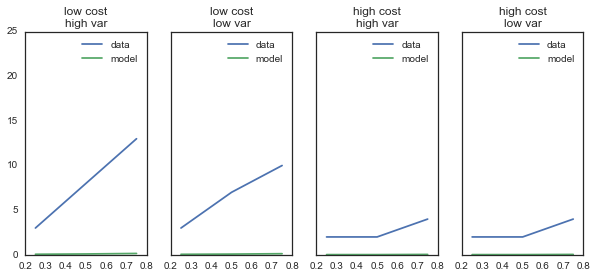

In [73]:
fig, ax = plt.subplots(1,4, figsize=(10,4), sharey=True)
i = -1
for cost in ['low', 'high']:
    for probvar in ['high', 'low']:

        i += 1
        q_obs = mquantiles(data[(data.probvar==probvar) & (data.cost==cost)].samplesize)
        q_model = data[(data.probvar==probvar) & (data.cost==cost)][['model_ss(.25)', 'model_ss(.5)', 'model_ss(.75)']].mean().values

        ax[i].plot([.25, .5, .75], q_obs, label='data')
        ax[i].plot([.25, .5, .75], q_model, label='model')
        ax[i].legend()
        ax[i].set_ylim(0, 25)
        ax[i].set_title('%s cost\n%s var' % (cost, probvar))
plt.show()

In [74]:
fitdf = pd.DataFrame()
for sid in SUBJ:
    
    r = pd.read_csv(OUTDIR+'/modelcomparison_subj=%s.csv' % sid, index_col=0)
    r['stoprule'] = 'optional'
    
    #r2 = pd.read_csv(OUTDIR+'/modelcomparison_subj=%s_planned.csv' % sid)
    #r2['stoprule'] = 'geometric'
    
    #fitdf = pd.concat((fitdf, r, r2))
    fitdf = pd.concat((fitdf, r))

In [75]:
fitdf

,sim_id,sid,cond_color,k,N,nllh,bic,p_stay,tau,theta,theta(cost=high),p_stop,pow_gain,stoprule
0,"markant2016_subj92(p_stay,tau,theta,theta(cost...",92.0,same,4.0,24.0,62.859754,138.431724,0.01048,0.000002,4.0,2.0,NaN,NaN,optional


In [114]:
# tau is not meaningful when theta=1

In [25]:
ind = (fitdf['stoprule']=='optional') & (fitdf['theta']!=1) & (fitdf['theta(cost=high)']!=1)

In [26]:
np.sum(ind)

24

In [27]:
fitdf[~((fitdf['theta']==1) & (fitdf['theta(cost=high)']==1))].shape

(29, 14)

In [28]:
fitdf.shape

(37, 14)

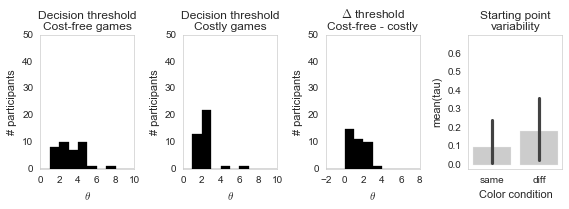

In [29]:
arr = []
for sid in SUBJ:
    arr.append(model_table(sid, force=True))
compdf = pd.concat(arr)

fitdf = compdf[~np.isnan(compdf['theta(cost=high)'])]

fig, ax = plt.subplots(1, 4, figsize=(8,3))

bc, x = np.histogram(np.array(fitdf['theta'].values, int), 
                     bins=range(11))
ax[0].bar(x[:-1], bc, 1, color='black', edgecolor='black')

bc, x = np.histogram(np.array(fitdf['theta(cost=high)'].values, int), 
                     bins=range(11))
ax[1].bar(x[:-1], bc, 1, color='black', edgecolor='black')

bc, x = np.histogram(np.array((fitdf['theta'] - fitdf['theta(cost=high)']).values, int), 
                     bins=range(-2,9))
ax[2].bar(x[:-1], bc, 1, color='black', edgecolor='black')

gt1 = fitdf[~((fitdf['theta']==1) & (fitdf['theta(cost=high)']==1))]
#sns.boxplot(x='cond_color', y='tau', data=gt1, ax=ax[3])
#sns.stripplot(x='cond_color', y='tau', data=gt1, jitter=.15, ax=ax[3])

sns.barplot(x='cond_color', y='tau', data=gt1, ax=ax[3], color=(.8,.8,.8))


#sns.boxplot(x='cond_color', y='p_stay', data=fitdf, ax=ax[4])
#sns.stripplot(x='cond_color', y='p_stay', data=fitdf, jitter=.15, ax=ax[4])

#sns.barplot(x='cond_color', y='p_stay', data=fitdf, ax=ax[4])

ax[0].set_title('Decision threshold\nCost-free games')
ax[1].set_title('Decision threshold\nCostly games')
ax[2].set_title(r'$\Delta$ threshold' + '\nCost-free - costly')
ax[3].set_title('Starting point\nvariability')
#ax[4].set_title('Starting point variability')

ax[3].set_xlabel('Color condition')

for axi in ax:
    for i in axi.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)

for axi in ax[:3]:
    axi.set_ylim(0,50)
    axi.set_xlabel(r'$\theta$')
    axi.set_ylabel('# participants')

for axi in ax[3:]:
    axi.set_ylim(-.02, 0.7)
plt.tight_layout()
plt.show()
#fig.savefig(FIGDEST+'bf_parameters.pdf', bbox_inches='tight')

In [35]:
from scipy.stats import ttest_ind

In [30]:
print fitdf[fitdf.cond_color=='same'].shape
print fitdf[fitdf.cond_color=='diff'].shape

(20, 13)
(17, 13)


In [31]:
tdf = fitdf[~((fitdf['theta']==1) & (fitdf['theta(cost=high)']==1))]
tdf.shape

(29, 13)

In [32]:
a = tdf[tdf.cond_color=='same']['tau'].values
b = tdf[tdf.cond_color=='diff']['tau'].values

In [33]:
print a.shape, a.std()
print b.shape, b.std()

(14,) 0.25438848392
(15,) 0.338233191527


In [36]:
ttest_ind(a, b)

Ttest_indResult(statistic=-0.74858673275117571, pvalue=0.46057820291253282)

In [76]:
preddf = data.groupby(['subject', 'probvar', 'cond_color', 'cost']).agg(np.mean).reset_index()

In [77]:
preddf = preddf[preddf.subject <= SUBJ[-1]]

In [78]:
preddf['cp_diff'] = preddf['choice'] - preddf['model_pH']

In [79]:
preddf[['subject', 'probvar', 'cost', 'choice', 'model_pH', 'cp_diff']]

,subject,probvar,cost,choice,model_pH,cp_diff
0,91,high,high,0.500000,0.000000,0.500000
1,91,high,low,0.500000,0.000000,0.500000
2,91,low,high,0.666667,0.000000,0.666667
3,91,low,low,0.500000,0.000000,0.500000
4,92,high,high,0.666667,0.698500,-0.031833
5,92,high,low,0.833333,0.883833,-0.050500
6,92,low,high,1.000000,0.838000,0.162000
7,92,low,low,1.000000,0.936667,0.063333


In [ ]:
# stickiness -- conditional probabiltiy of choosing same option

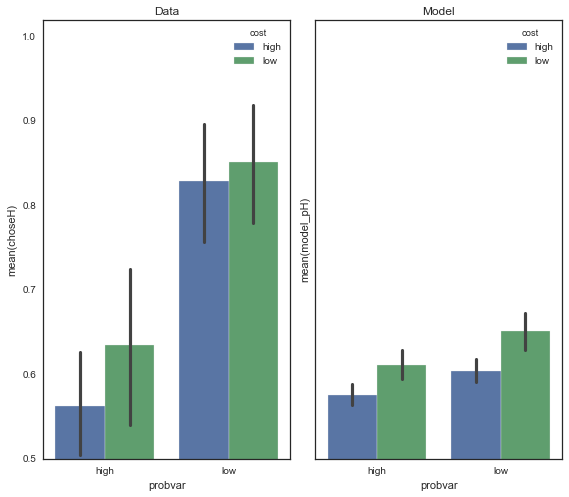

In [51]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,7))
sns.barplot(x='probvar', y='choseH', hue='cost', data=preddf, ax=ax[0])
sns.barplot(x='probvar', y='model_pH', hue='cost', data=preddf, ax=ax[1])
ax[0].set_ylim(0.5,1.02)
ax[1].set_ylim(0.5,1.02)
ax[0].set_title('Data')
ax[1].set_title('Model')
plt.tight_layout()
plt.show()

In [53]:
plotdf = data.rename(columns={'cost': 'Sampling cost',
                              'probvar': 'Outcome variance'})

plotdf['Sampling cost'] = plotdf['Sampling cost'].apply(lambda x: 'Costly' if x=='high' else 'Cost-free')

/Users/markant/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2183: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


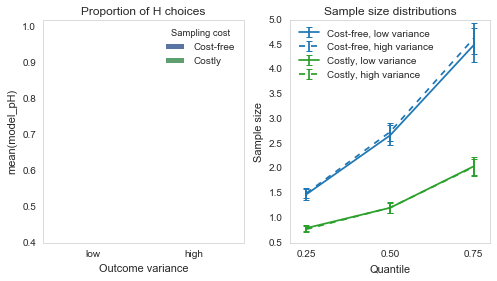

In [54]:
styl = {'low': '-',
        'high': '--'}
col = {'Cost-free': tableau20[0],
       'Costly': tableau20[4]}

p = [.25, .5, .75]
#from matplotlib import gridspec
#fig = plt.figure(figsize=(10, 5)) 
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.6])

fig, axi = plt.subplots(1, 2, figsize=(7,4))

ax = axi[0]
sns.barplot(x='Outcome variance', y='model_pH', hue='Sampling cost', linewidth=2, edgecolor='white',
            errcolor='black', capsize=.1, x_order=['low', 'high'], hue_order=['Cost-free', 'Costly'],
            data=plotdf, ax=ax)
ax.set_ylim(0.4,1.02)
ax.set_title('Proportion of H choices')

#ax = plt.subplot(gs[1])
ax = axi[1]
for cost in ['Cost-free', 'Costly']:
    for probvar in ['low', 'high']:

        sel = plotdf[(plotdf['Outcome variance']==probvar) & (plotdf['Sampling cost']==cost)]
        q = sel.groupby('problem').apply(lambda d: d[['model_ss(.25)', 'model_ss(.5)', 'model_ss(.75)']].mean()).values
        q_model = q.mean(axis=0)
        q_se_model  = q.std(axis=0)/np.sqrt(q.shape[0])


        ax.errorbar([.25, .5, .75], q_model, yerr=q_se_model, 
                    fmt=styl[probvar], color=col[cost],
                    label=('%s, %s variance' % (cost, probvar)),
                    markeredgewidth=1)

        #ax.set_ylim(0, 15)
        ax.legend(loc='upper left')


ax.set_xlabel('Quantile')
ax.set_xticks(p)
ax.set_ylabel('Sample size')
ax.set_title('Sample size distributions')

#fig.text(.02,.93,'A', fontsize=15, fontweight='semibold')
#fig.text(.52,.93,'B', fontsize=15, fontweight='semibold')


for ax in axi.ravel():
    for i in ax.spines.itervalues():
        i.set_linewidth(AX_LW)
        i.set_color(AX_COL)
plt.tight_layout()
plt.show()
#fig.savefig(FIGDEST + 'exp1_results_fit.pdf', bbox_inches='tight')

## fixed stopping (geometric)

In [175]:
# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 10],
        'p_stay': [0, 1, .3],
        'tau': [0, 1, .5],
        'prelec_gamma': [0, 5, 1.],
        'prelec_elevation': [0, 5, 1.],
        'prelec_gamma_loss': [0, 5, 1.],
        'prelec_elevation_loss': [0, 5, 1.],
        'pow_gain': [0., 10, 1.],
        'w_loss': [0., np.inf, 1.],
        'lambda': [-2, 2, 0.],
        'p_stop': [0, 1, .5]}

FIXED = {'c': 0.5,
         'theta': 30,
         'optiontype': 'normal',}

N_ITER = 1
OUTDIR = 'chase_fitresults_markant2016'

# a list of different parameter combinations that will
# be fit
PARSETS = [#['p_stop', 'p_stay', 'tau'],
           ['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau'],
           #['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'pow_gain'],
           #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
           #['p_stop', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
           #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation', 'pow_gain', 'w_loss'],
           ]

In [63]:
SSET = data.subject.unique()

for sid in SSET:
    print sid
    SIM_ID = 'markant2016_subj%s_planned' % sid
    for parset in PARSETS:
        print parset
        fitting = {}
        for p in parset:
            if p.count('(') > 0:
                fitting[p] = PARS[p.split('(')[0]]
            else:
                fitting[p] = PARS[p]

        m = CHASEAlternateStoppingModel(drift='cpt',
                                        startdist='laplace',
                                        stoprule='geometric',
                                        problemtype='normal',
                                        problems=problems)

        results = fit_mlh(m, problems, data[data.subject==sid], 
                          SIM_ID, FIXED, fitting, niter=N_ITER, outdir=OUTDIR)

        print results.sort('nllh')

91
['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'pow_gain']
markant2016_subj91_planned(p_stay,p_stop,p_stop(cost=high),pow_gain,tau|c=0.5,optiontype=normal,theta=30)
0/1
[]: []
iteration                      0
success                     True
nllh                     40.9651
k                              5
N                             24
bic                      97.8205
theta                         30
p_stay                  0.332197
p_stop                  0.631512
p_stop(cost=high)    1.80814e-08
pow_gain                 1.04229
tau                     0.611781
Name: 0, dtype: object
   iteration success       nllh  k   N        bic  theta    p_stay    p_stop  \
0          0    True  40.965128  5  24  97.820526     30  0.332197  0.631512   

   p_stop(cost=high)  pow_gain       tau  
0       1.808137e-08  1.042293  0.611781  
92
['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau', 'pow_gain']
markant2016_subj92_planned(p_stay,p_stop,p_stop(cost=high),pow_gain,tau|c=0.5,optiontype=

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [6]:
SUBJ = data.subject.unique()

m = CHASEAlternateStoppingModel(drift='ev',
                                startdist='laplace',
                                stoprule='geometric',
                                problemtype='normal')


#cp = {}
data['model_pH'] = np.zeros(data.shape[0])

for sid in SUBJ:
    cond_color = data.loc[data.subject==sid]['cond_color'].values[0]

    results = pd.DataFrame([], columns=['sim_id', 'sid', 'cond_color', 'k', 'N', 'nllh', 'bic', 'p_stay', 'tau', 
                                        'theta', 'theta(cost=high)', 'p_stop'])

    for i, parset in enumerate(PARSETS):
        model_id = 'markant2016_subj%s_planned' % sid
        fitting = {}
        for p in parset:
            if p.count('(') > 0:
                fitting[p] = PARS[p.split('(')[0]]
            else:
                fitting[p] = PARS[p]

        b = best_result(model_id, FIXED, fitting, outdir=OUTDIR)
        #pred_cp = predict_from_result(m, problems, data[data.subject==sid], model_id, FIXED, 
        #               fitting = fitting, 
        #               outdir=OUTDIR)
        #data.loc[data.subject==sid,'model_pH'] = pred_cp
        
        #cp[sid] = {p: pred[p]['p_resp'][1] for p in pred}
        b['sid'] = sid
        b['cond_color'] = cond_color
        results.loc[results.shape[0]] = b

    results.to_csv(OUTDIR+'/modelcomparison_subj=%s_planned.csv' % sid)

/Users/markant/code/chase/chase/fit.py:98: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fitdf = fitdf[fitdf.success==True].sort('nllh').reset_index()


## fixed stopping (normal)

In [ ]:
# a list of possible free parameters and their ranges
# and starting point (optional)
PARS = {'theta': [1, 10],
        'p_stay': [0, 1, .3],
        'tau': [0, 1, .5],
        'prelec_gamma': [0, 5, 1.],
        'prelec_elevation': [0, 5, 1.],
        'prelec_gamma_loss': [0, 5, 1.],
        'prelec_elevation_loss': [0, 5, 1.],
        'pow_gain': [0., np.inf, 1.],
        'w_loss': [0., np.inf, 1.],
        'lambda': [-2, 2, 0.],
        'p_stop': [0, 1, .5]}

FIXED = {'c': 0.5,
         'theta': 30,
         'optiontype': 'normal',}

N_ITER = 1
OUTDIR = 'chase_fitresults_markant2016'

# a list of different parameter combinations that will
# be fit
PARSETS = [#['p_stop', 'p_stay', 'tau'],
           ['p_stop', 'p_stop(cost=high)', 'p_stay', 'tau'],
           #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation'],
           #['p_stop', 'p_stay', 'tau', 'pow_gain', 'w_loss'],
           #['p_stop', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation', 'pow_gain', 'w_loss'],
           ]

## comparison

In [176]:
fitdf = pd.DataFrame()
for sid in SUBJ:
    
    r = pd.read_csv(OUTDIR+'/modelcomparison_subj=%s.csv' % sid)
    r['stoprule'] = 'optional'
    
    r2 = pd.read_csv(OUTDIR+'/modelcomparison_subj=%s_planned.csv' % sid)
    r2['stoprule'] = 'geometric'
    
    fitdf = pd.concat((fitdf, r, r2))

In [177]:
bics = []
for sid in SUBJ:
    bic_opt  = fitdf[(fitdf.sid==sid) & (fitdf.stoprule=='optional')]['bic'].values[0]
    bic_geom = fitdf[(fitdf.sid==sid) & (fitdf.stoprule=='geometric')]['bic'].values[0]
    bics.append([sid, bic_opt, bic_geom])
scoredf = pd.DataFrame(bics, columns=['sid', 'bic_opt', 'bic_geom'])
scoredf['diff'] = scoredf['bic_geom'] - scoredf['bic_opt']

In [178]:
scoredf.sort('diff')

/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,sid,bic_opt,bic_geom,diff
28,123,131.016087,99.975090,-31.040996
41,142,72.589684,46.161509,-26.428175
5,97,90.517774,64.866666,-25.651107
0,91,114.496797,94.639319,-19.857478
20,113,87.800754,68.950625,-18.850130
13,105,149.857800,134.920932,-14.936869
39,140,161.147049,146.493716,-14.653333
10,102,126.844835,113.127383,-13.717452
37,138,137.229139,124.284902,-12.944236
72,184,122.213237,109.842227,-12.371010


/Users/markant/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


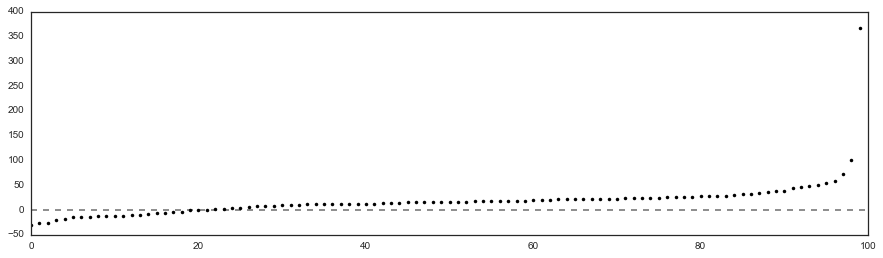

In [179]:
diff = (scoredf['bic_geom'] - scoredf['bic_opt'])
diff.sort()
fig, ax = plt.subplots(figsize=(15,4))
ax.plot([0, diff.shape[0]], [0, 0], '--', color='gray')
ax.plot(range(diff.shape[0]), diff.values, '.', color='black')
plt.show()

In [181]:
print np.sum((diff > 0).values)
print np.sum((diff > 0).values)/float(diff.shape[0])

81
0.81


# bayesian

## pymc2

In [3]:
import pymc
from mcmc import run_sampler
from copy import deepcopy

m = CHASEModel(drift='ev',
               startdist='laplace',
               problemtype='normal')

FIXED = {'c': 0.5,
         'optiontype': 'normal'}

Couldn't import dot_parser, loading of dot files will not be possible.


### group level

In [8]:
def lh(value, p_stay, tau_same, tau_diff, theta_low, theta_high):

    llh = []
    
    for i, grp in data.groupby(['problem', 'cond_color', 'cost']):
        cc = grp['cond_color'].values[0]
        cost = grp['cost'].values[0]
        pid = grp['problem'].values[0]
        pars = deepcopy(FIXED)
        pars['max_T'] = grp.samplesize.max() + 1
        pars['probid'] = pid
        pars['p_stay'] = p_stay
        
        if cc=='diff':    pars['tau'] = tau_diff
        else:             pars['tau'] = tau_same
        
        if cost == 'low': pars['theta'] = theta_low + 1
        else:             pars['theta'] = theta_high + 1

        # run the model
        results = m(problems[pid], pars)
        ss = np.array(grp.samplesize.values, int) - 1
        choices = np.array(grp.choice.values, int)
        llh.append(np.sum((np.log(pfixa(results['p_resp'][choices])) + \
                   np.log(pfixa(results['p_stop_cond'][ss, choices])))))
        
    return np.sum(llh)

(array([  6.11900000e+03,   2.37200000e+03,   9.06000000e+02,
          3.57000000e+02,   1.42000000e+02,   6.20000000e+01,
          1.70000000e+01,   1.60000000e+01,   6.00000000e+00,
          3.00000000e+00]),
 array([   0.,   93.,  186.,  279.,  372.,  465.,  558.,  651.,  744.,
         837.,  930.]),
 <a list of 10 Patch objects>)

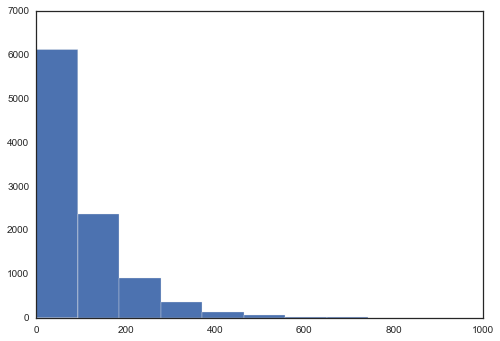

In [22]:
plt.hist(pymc.rnegative_binomial(100., 1., size=10000))

In [24]:
name = 'chase_mcmc_markant2016'
sim_id = name

p_stay = pymc.Beta('p_stay', 1, 1, value=.5)
tau_same = pymc.Beta('tau_same', 1, 1, value=.5)
tau_diff = pymc.Beta('tau_diff', 1, 1, value=.5)
#theta_high = pymc.DiscreteUniform('theta_high', lower=1, upper=10, value=3)
#theta_low = pymc.DiscreteUniform('theta_low', lower=1, upper=10, value=3)

mu_low     = pymc.Gamma('mu_low', .001, .001, value=1)
alpha_low  = pymc.Gamma('alpha_low', .001, .001, value=1)
theta_low  = pymc.NegativeBinomial('theta_low', mu=mu_low, alpha=alpha_low)

mu_high    = pymc.Gamma('mu_high', .001, .001, value=1)
alpha_high = pymc.Gamma('alpha_high', .001, .001, value=1)
theta_high = pymc.NegativeBinomial('theta_high', mu=mu_high, alpha=alpha_high)

obs = pymc.Stochastic(value=[],
                      logp=lh,
                      name='obs',
                      doc='Observations',
                      parents={'p_stay': p_stay,
                               'tau_same': tau_same,
                               'tau_diff': tau_diff,
                               'theta_low': theta_low,
                               'theta_high': theta_high},
                      observed=True)

run_sampler([p_stay, tau_same, tau_diff, 
             mu_low, alpha_low, theta_low, 
             mu_high, alpha_high, theta_high],
            [obs], ['p_stay', 'tau_same', 'tau_diff', 
                    'mu_low', 'alpha_low', 'theta_low',
                    'mu_high', 'alpha_high', 'theta_high'],
            name, sim_id, n_samples=500, n_burn=10)

 [-----------------100%-----------------] 501 of 500 complete in 690.3 sec
tau_diff:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.917            0.056            0.004            [ 0.789  0.991]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.789            0.903           0.929          0.95          0.991
	

alpha_low:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	17.393           6.683            0.714          [  5.11   31.499]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	3.228            12.596          18.185         22.268        30.579
	

alpha_high:
 
	Me

In [25]:
from mcmc import pth
import pickle
with open(pth(name, sim_id, '', 'db'), 'r') as f:
    F = pickle.load(f)

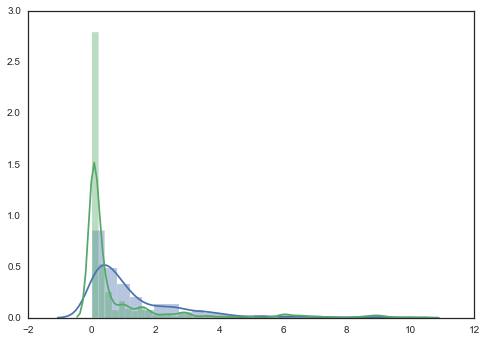

In [30]:
sns.distplot(F['mu_low'][0])
sns.distplot(F['mu_high'][0])

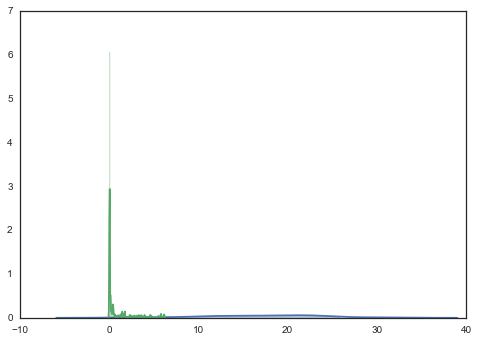

In [31]:
sns.distplot(F['alpha_low'][0])
sns.distplot(F['alpha_high'][0])

(array([   0.,    0.,    0.,    0.,    0.,  490.,    0.,    0.,    0.,    0.]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5]),
 <a list of 10 Patch objects>)

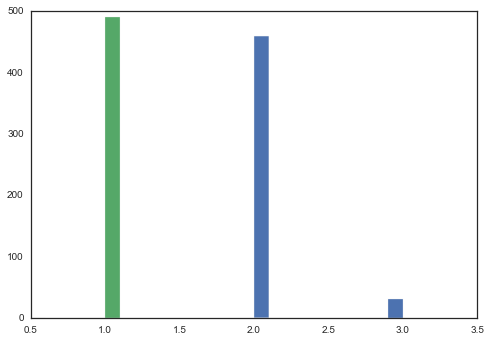

In [36]:
plt.hist(F['theta_low'][0] + 1)
plt.hist(F['theta_high'][0] + 1)

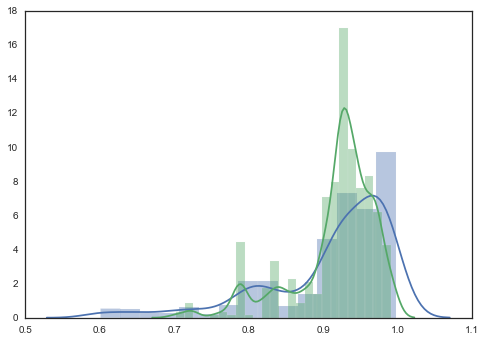

In [37]:
sns.distplot(F['tau_same'][0])
sns.distplot(F['tau_diff'][0])

### individuals

In [7]:
data.subject.unique()

array([ 91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       120, 121, 123, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153,
       154, 155, 158, 159, 161, 162, 163, 166, 169, 170, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 183, 184, 186, 188, 190, 191, 192,
       194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 213, 214, 215, 216, 217, 218])

In [8]:
fitdata = data[data.subject<93]

def lh(value, p_stay, tau, theta_low, theta_high):

    llh = []
    
    for i, grp in fitdata.groupby(['subject', 'problem', 'cost']):
        sid = grp['subject'].values[0]
        pid = grp['problem'].values[0]
        cost = grp['cost'].values[0]
        pars = deepcopy(FIXED)
        pars['max_T'] = grp.samplesize.max() + 1
        pars['probid'] = pid
        
        s_index = list(data.subject.unique()).index(sid)
        pars['p_stay'] = p_stay[s_index]
        pars['tau'] = tau[s_index]
        if cost == 'low': pars['theta'] = theta_low[s_index]
        else:             pars['theta'] = theta_high[s_index]

        # run the model
        results = m(problems[pid], pars)
        ss = np.array(grp.samplesize.values, int) - 1
        choices = np.array(grp.choice.values, int)
        llh.append(np.sum((np.log(pfixa(results['p_resp'][choices])) + \
                   np.log(pfixa(results['p_stop_cond'][ss, choices])))))

    return np.sum(llh)

name = 'chase_mcmc_individual_markant2016'
sim_id = name

k = 100
p_stay     = np.empty(k, dtype=object)
tau        = np.empty(k, dtype=object)
theta_low  = np.empty(k, dtype=object)
theta_high = np.empty(k, dtype=object)

savevars = []
for i in range(k):
    p_stay[i]     = pymc.Beta('p_stay_%s' % i, 1, 1, value=.5)
    tau[i]        = pymc.Beta('tau_%s' % i, 1, 1, value=.5)
    theta_high[i] = pymc.DiscreteUniform('theta_high_%s' % i, lower=1, upper=10, value=3)
    theta_low[i]  = pymc.DiscreteUniform('theta_low_%s' % i, lower=1, upper=10, value=3)
    savevars = savevars + ['p_stay_%s' % i, 'tau_%s' % i, 'theta_high_%s' % i, 'theta_low_%s' % i]
    
obs = pymc.Stochastic(value=[],
                      logp=lh,
                      name='obs',
                      doc='Observations',
                      parents={'p_stay': p_stay,
                               'tau': tau,
                               'theta_low': theta_low,
                               'theta_high': theta_high},
                      observed=True)

run_sampler([p_stay, tau, theta_low, theta_high],
            [obs], savevars,
            name, sim_id, n_samples=500, n_burn=10)

/Users/markant/anaconda/lib/python2.7/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']
/Users/markant/code/chase/chase/base.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p_stop_cond = p_stop_cond.reshape((self.max_T, 1./self.dt, 2)).sum(axis=1)


 [----             12%                  ] 60 of 500 complete in 1230.3 secHalting at iteration  59  of  500

p_stay_24:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.653            0.243            0.035            [ 0.186  0.965]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.103            0.548           0.741          0.865         0.965
	

theta_high_28:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	5.959            2.996            0.428                [  1.  10.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.0              3.0             6.0            9.

### hierarchical

In [42]:
from time import time

In [80]:
data.subject.unique()

array([ 91,  92,  93,  94,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119,
       120, 121, 123, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153,
       154, 155, 158, 159, 161, 162, 163, 166, 169, 170, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 183, 184, 186, 188, 190, 191, 192,
       194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 213, 214, 215, 216, 217, 218])

In [108]:
FIXED = {'c': 0.5, 
         'optiontype': 'normal',
         'p_stay': .3}

In [110]:
fitdata = data[data.subject<98]
#fitdata = data
cond = fitdata[fitdata.gameind==0]['cond_color'].values
s_indices = {sid: list(data.subject.unique()).index(sid) for sid in data.subject.unique()}
max_ss = {sid: data[data.subject==sid].samplesize.max() + 1 for sid in data.subject.unique()}

def lh(value, tau, theta_low, theta_high):
    llh = 0
    pars = deepcopy(FIXED)
    for (sid, pid, cost), grp in fitdata.groupby(['subject', 'problem', 'cost']):
        
        pars['max_T'] = max_ss[sid]
        pars['probid'] = pid
        s_index = s_indices[sid]
        #pars['p_stay'] = p_stay
        pars['tau'] = tau[s_index]
        if cost == 'low': pars['theta'] = 1 + theta_low[s_index]
        else:             pars['theta'] = 1 + theta_high[s_index]
            
        # run the model
        results = m(problems[pid], pars)
        ss = np.array(grp.samplesize.values, int) - 1
        choices = np.array(grp.choice.values, int)
        llh += np.sum((np.log(pfixa(results['p_resp'][choices])) + \
               np.log(pfixa(results['p_stop_cond'][ss, choices]))))
    return llh

name = 'chase_mcmc_hier_markant2016'
sim_id = name

k = len(fitdata.subject.unique())
tau        = np.empty(k, dtype=object)
theta_low  = np.empty(k, dtype=object)
theta_high = np.empty(k, dtype=object)

#p_stay     = pymc.Beta('p_stay', 1, 1, value=.5)

mu_low     = pymc.Gamma('mu_low', .001, .001, value=1)
alpha_low  = pymc.Gamma('alpha_low', .001, .001, value=1)

mu_high    = pymc.Gamma('mu_high', .001, .001, value=1)
alpha_high = pymc.Gamma('alpha_high', .001, .001, value=1)

a_same     = pymc.Gamma('a_same', .001, .001, value=1)
b_same     = pymc.Gamma('b_same', .001, .001, value=1)

a_diff     = pymc.Gamma('a_diff', .001, .001, value=1)
b_diff     = pymc.Gamma('b_diff', .001, .001, value=1)


savevars = ['mu_low', 'alpha_low', 'mu_high', 'alpha_high', 
            'a_same', 'b_same', 'a_diff', 'b_diff']

for i in range(k):
    
    #p_stay[i]     = pymc.Beta('p_stay_%s' % i, 1, 1)
    
    if cond[i]=='same': 
        tau[i]    = pymc.Beta('tau_%s' % i, a_same, b_same)
    else:
        tau[i]    = pymc.Beta('tau_%s' % i, a_diff, b_diff)
        
    theta_low[i]  = pymc.NegativeBinomial('theta_low_%s' % i, mu=mu_low, alpha=alpha_low)
    theta_high[i] = pymc.NegativeBinomial('theta_high_%s' % i, mu=mu_high, alpha=alpha_high)
    savevars = savevars + ['tau_%s' % i, 'theta_high_%s' % i, 'theta_low_%s' % i]
    
obs = pymc.Stochastic(value=[],
                      logp=lh,
                      name='obs',
                      doc='Observations',
                      parents={'tau': tau,
                               'theta_low': theta_low,
                               'theta_high': theta_high},
                      observed=True)

print savevars

run_sampler([tau, theta_low, theta_high, mu_low, alpha_low, 
             mu_high, alpha_high, a_same, b_same, a_diff, b_diff],
            [obs], savevars,
            name, sim_id, n_samples=500, n_burn=10)

['mu_low', 'alpha_low', 'mu_high', 'alpha_high', 'a_same', 'b_same', 'a_diff', 'b_diff', 'tau_0', 'theta_high_0', 'theta_low_0', 'tau_1', 'theta_high_1', 'theta_low_1', 'tau_2', 'theta_high_2', 'theta_low_2', 'tau_3', 'theta_high_3', 'theta_low_3', 'tau_4', 'theta_high_4', 'theta_low_4', 'tau_5', 'theta_high_5', 'theta_low_5']
11
 [-----------------100%-----------------] 501 of 500 complete in 1289.2 sec
alpha_low:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	5.677            5.847            0.594          [  0.144  18.018]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.234            0.93            2.907          9.845         18.678
	

a_diff:
 
	Mean             SD               MC Error        95% HPD interval
	----------------------------------------------------------

In [86]:
from mcmc import pth
import pickle
with open(pth(name, sim_id, '', 'db'), 'r') as f:
    F = pickle.load(f)

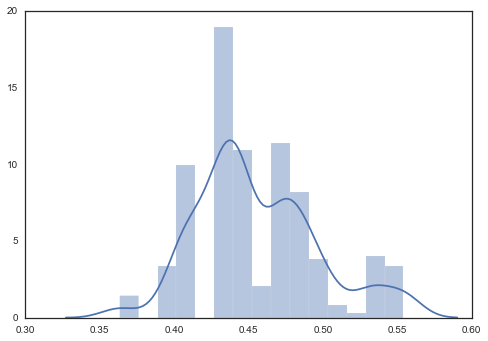

In [91]:
sns.distplot(F['p_stay'][0])

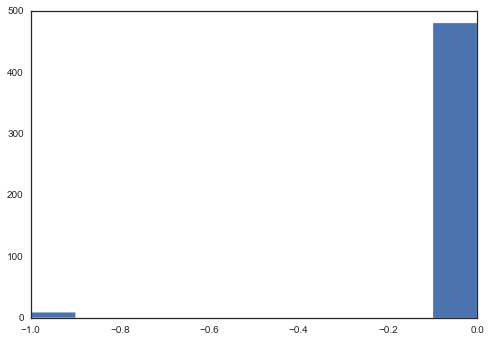

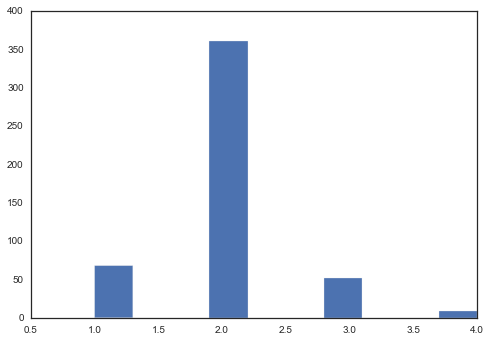

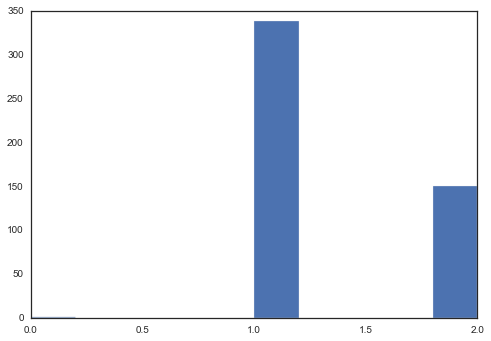

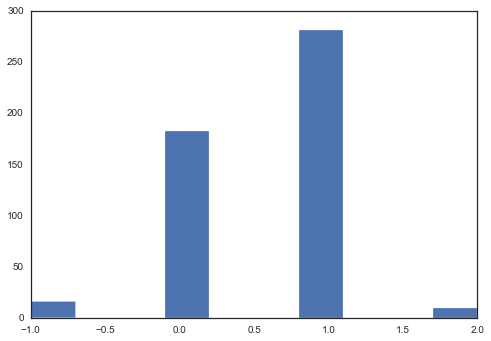

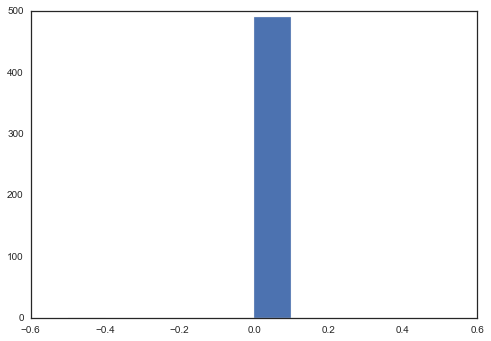

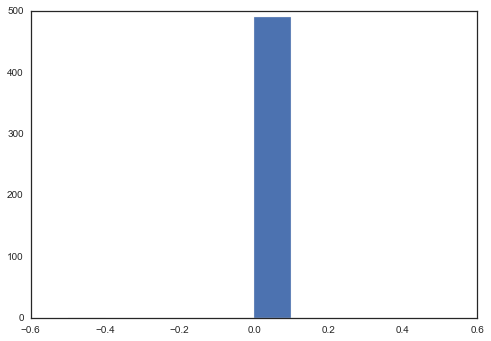

In [99]:
for i in range(6):
    fig, ax = plt.subplots()
    ax.hist(F['theta_low_%s' % i][0] - F['theta_high_%s' % i][0])
    plt.show()

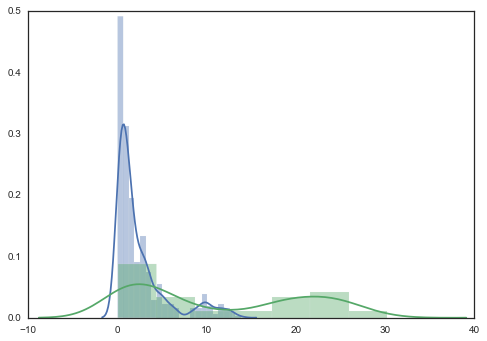

In [90]:
sns.distplot(F['alpha_low'][0])
sns.distplot(F['alpha_high'][0])

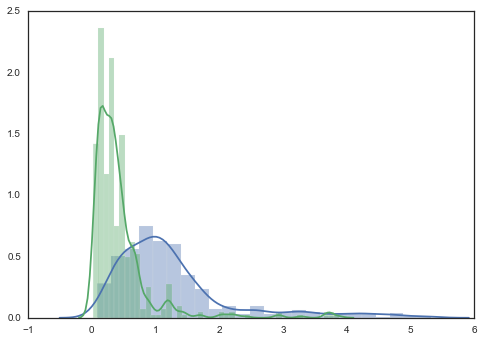

In [100]:
sns.distplot(F['mu_low'][0])
sns.distplot(F['mu_high'][0])

In [104]:
for i in range(6):
    print cond[i], np.mean(F['tau_%s' % i][0])

diff 0.126607207195
same 0.134875480244
same 0.376682192994
diff 0.017907265711
same 0.285441802307
same 0.373048013908


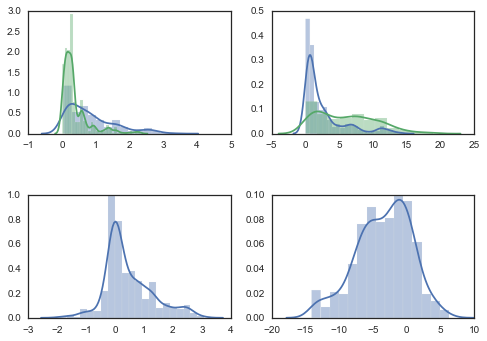

In [105]:
#sns.distplot(F['mu_low'][0])
#sns.distplot(F['mu_high'][0])

#sns.distplot(F['alpha_low'][0])
#sns.distplot(F['alpha_high'][0])

fig, axi = plt.subplots(2, 2)
ax = axi[0][0]
sns.distplot(F['a_same'][0], ax=ax)
sns.distplot(F['a_diff'][0], ax=ax)

ax = axi[0][1]
sns.distplot(F['b_same'][0], ax=ax)
sns.distplot(F['b_diff'][0], ax=ax)


ax = axi[1][0]
sns.distplot(F['a_same'][0] - F['a_diff'][0], ax=ax)


ax = axi[1][1]
sns.distplot(F['b_same'][0] - F['b_diff'][0], ax=ax)


plt.show()

0.44823187325789637

In [135]:
from scipy.stats import beta

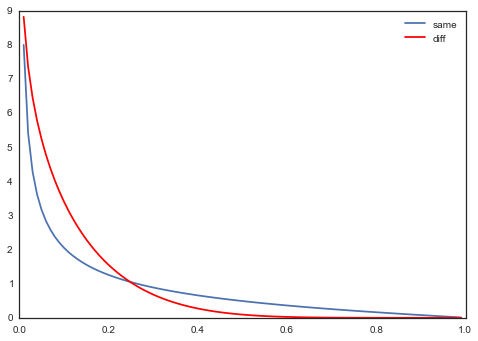

In [139]:
b = pymc.distributions.beta_like
xs = np.arange(.01, 1, .01)
fig, ax = plt.subplots()

ax.plot(xs, [beta.pdf(x, np.mean(F['a_same'][0]), np.mean(F['b_same'][0])) for x in xs], label='same')
ax.plot(xs, [beta.pdf(x, np.mean(F['a_diff'][0]), np.mean(F['b_diff'][0])) for x in xs], color='red', label='diff')
ax.legend()
plt.show()

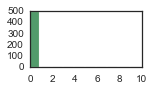

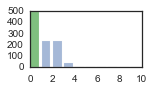

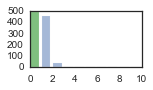

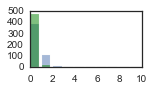

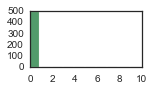

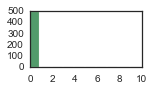

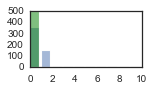

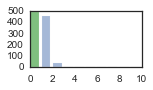

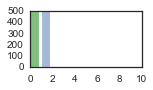

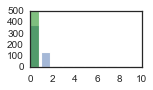

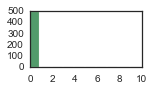

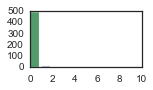

In [120]:
for i in range(k):
    fig, ax = plt.subplots(figsize=(2,1))
    ax.bar(range(10), np.bincount(F['theta_low_%s' % i][0], minlength=10), alpha=.5)
    ax.bar(range(10), np.bincount(F['theta_high_%s' % i][0], minlength=10), color='green', alpha=.5)
    plt.show()

In [12]:
nb = pymc.distributions.negative_binomial_like

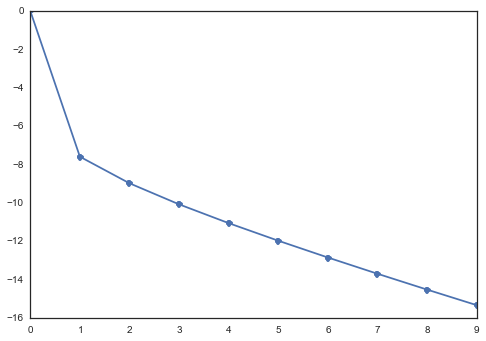

In [103]:
plt.plot([nb(x, .001, 0.001) for x in np.arange(0, 10)], '-o')

In [35]:
g = pymc.distributions.gamma_like

In [40]:
pymc.distributions.gamma_like?

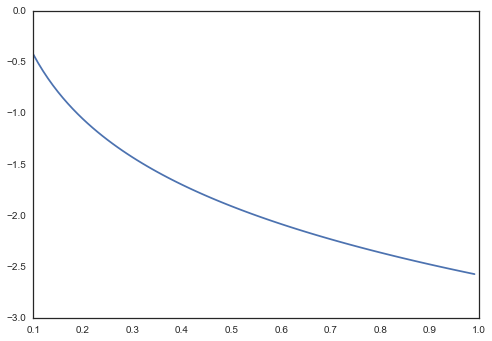

In [144]:
xs = np.arange(.1, 1, .01)
plt.plot(xs, [g(x, .1, .1) for x in xs])

In [145]:
from scipy.stats import gamma

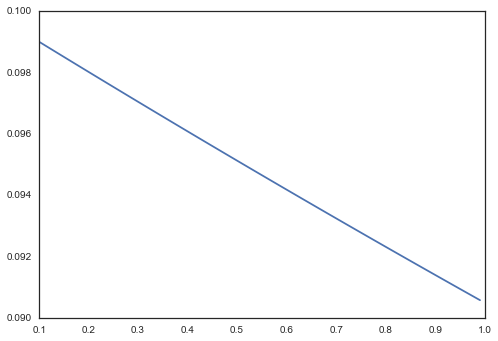

In [158]:
plt.plot(xs, [gamma.pdf(x, 1, scale=10) for x in xs])

# pymc3

In [10]:
import pymc3 as pm

In [11]:
m = CHASEModel(drift='ev',
               startdist='laplace',
               problemtype='normal')

FIXED = {'c': 0.5,
         'optiontype': 'normal'}

In [26]:
def logp_chase(p_stay, tau_same, tau_diff, theta_low, theta_high):
    """Returns the log-likelihood function for observed choices
    and sample sizes
    
    """
    
    def ll_obs(value):
            
        llh = []

        for i, grp in data.groupby(['problem', 'cond_color', 'cost']):
            cc = grp['cond_color'].values[0]
            cost = grp['cost'].values[0]
            pid = grp['problem'].values[0]
            pars = deepcopy(FIXED)
            pars['max_T'] = grp.samplesize.max() + 1
            pars['probid'] = pid
            pars['p_stay'] = p_stay

            if cc=='diff':    pars['tau'] = tau_diff
            else:             pars['tau'] = tau_same

            if cost == 'low': pars['theta'] = theta_low
            else:             pars['theta'] = theta_high

            print p_stay
                
            # run the model
            results = m(problems[pid], pars)
            ss = np.array(grp.samplesize.values, int) - 1
            choices = np.array(grp.choice.values, int)
            llh.append(np.sum((np.log(pfixa(results['p_resp'][choices])) + \
                       np.log(pfixa(results['p_stop_cond'][ss, choices])))))
        
        return np.sum(llh)
    
    return ll_obs

In [36]:
p_stay.__class__

pymc3.model.TransformedRV

In [27]:
name = 'chase_mcmc3_markant2016'
sim_id = name

np.random.seed(123)

group_model = pm.Model()

with group_model:

    p_stay     = pm.Beta('p_stay', 1, 1)
    tau_same   = pm.Beta('tau_same', 1, 1)
    tau_diff   = pm.Beta('tau_diff', 1, 1)
    theta_high = pm.DiscreteUniform('theta_high', lower=1, upper=12)
    theta_low  = pm.DiscreteUniform('theta_low', lower=1, upper=12)

    obs = pm.DensityDist('obs', 
                         logp_chase(p_stay, tau_same, tau_diff, theta_low, theta_high), 
                         observed=[])
    

"""
run_sampler([p_stay, tau_same, tau_diff, theta_low, theta_high],
            [obs], ['p_stay', 'tau_same', 'tau_diff', 'theta_low', 'theta_high'],
            name, sim_id, n_samples=500, n_burn=10)
"""

p_stay


TypeError: int() argument must be a string or a number, not 'TensorVariable'

In [13]:
group_model.named_vars

{'p_stay_logodds_': p_stay_logodds_,
 'tau_diff_logodds_': tau_diff_logodds_,
 'tau_same_logodds_': tau_same_logodds_,
 'theta_high': theta_high,
 'theta_low': theta_low}

In [319]:
xs = np.arange(0,1,.0001)

In [320]:
np.sum([x * ((3/2.) * (x**.5)) for x in xs])

5999.250018711773

In [308]:
3/5.

0.6

In [317]:
np.sum(((3/2.) * (xs**.5)))

999.2402015905227

In [322]:
p = ((3/2.) * (xs**.5))

np.dot(xs, p) * (1/p.sum())

0.59997018634847776

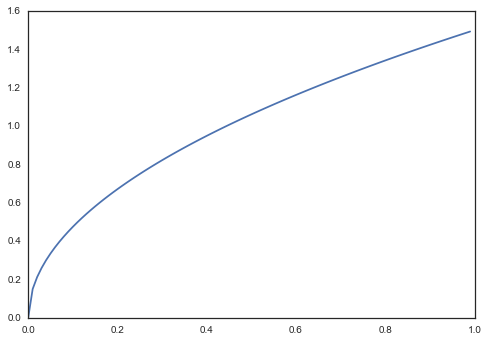

In [311]:
plt.plot(xs, ((3/2.) * (xs**.5)))

In [107]:
FIGDEST = '/Users/markant/Box Sync/Presentations/2016.11.16_Psychonomics_poster/'

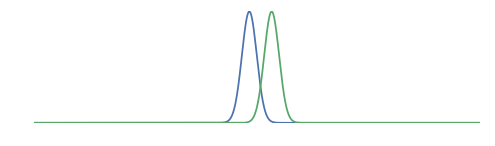

In [111]:
x = np.arange(-100, 200, .1)
fig, ax = plt.subplots(figsize=(8,2))
ax.plot(x, norm.pdf(x, loc=45, scale=5))
ax.plot(x, norm.pdf(x, loc=60, scale=5))
ax.axis('off')
plt.show()
fig.savefig(FIGDEST+'option_lowvar.pdf', bbox_inches='tight')

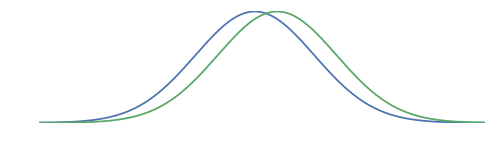

In [112]:
fig, ax = plt.subplots(figsize=(8,2))
ax.plot(x, norm.pdf(x, loc=45, scale=40))
ax.plot(x, norm.pdf(x, loc=60, scale=40))
ax.axis('off')
plt.show()
fig.savefig(FIGDEST+'option_highvar.pdf', bbox_inches='tight')